In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/CS594 - DNLP/Assignments/Assignment 1/

/content/drive/My Drive/CS594 - DNLP/Assignments/Assignment 1


In [8]:
import pandas as pd
import numpy as np
import os
# import src
import matplotlib.pyplot as plt

In [9]:
pip install -U mittens

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from sklearn.feature_extraction.text import CountVectorizer
from mittens import GloVe, Mittens

In [11]:
pip install autocorrect

     |████████████████████████████████| 624kB 2.8MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.2.2-cp36-none-any.whl size=621491 sha256=4dd0b5618f3bbc1a4c2e7a5579c1a402bc1b2ead1aa0aee462716ab4601d216d
  Stored in directory: /root/.cache/pip/wheels/b4/0b/7d/98268d64c8697425f712c897265394486542141bbe4de319d6
Successfully built autocorrect


In [12]:

import nltk
# nltk.download()
import string
from nltk.tokenize import word_tokenize
import random
import pickle
from nltk.corpus import stopwords

from autocorrect import Speller
# from pycontractions import Contractions

# from spellchecker import SpellChecker

import re
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer 

from hyperopt import fmin, tpe, hp

In [13]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [14]:
from numpy import asarray
from numpy import zeros
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten, Dropout, MaxPool1D
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional

In [15]:
# nltk.download('all')

In [16]:
# # Load your favorite word2vec model
# cont = Contractions('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz')
# text = "we're"
# text = list(cont.expand_texts([text], precise=True))[0]

In [17]:
def conv_dataframes(pos_path, neg_path):
    with open(pos_path,'r',encoding='latin1') as f:
        data_p = f.readlines()
#     print(data_p[11])
    with open(neg_path,'r',encoding='latin1') as f:
        data_n = f.readlines()
    pos_data = shuffle(pd.DataFrame(data_p, columns = ["Doc Text"]))
#     pos_data['Sentiment'] = 1
#     pos_data.columns = ["Doc Text", "Sentiment"]
    neg_data = shuffle(pd.DataFrame(data_n, columns = ["Doc Text"]))
#     neg_data['Sentiment'] = -1
#     neg_data.columns = ["Doc Text", "Sentiment"]
    return pos_data, neg_data


## The code for pos tagging and lemmatize sentence is fron the following link:
 ### https://medium.com/@gaurav5430/using-nltk-for-lemmatizing-sentences-c1bfff963258

In [18]:
# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [19]:
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
#     print(wordnet_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
#         if tag is not None:
#             lemmatized_sentence.append(lemmatizer.lemmatize(word, tag)) 

    return " ".join(lemmatized_sentence)

In [20]:
# print(lemmatizer.lemmatize("I am loving it")) #I am loving it
# print(lemmatizer.lemmatize("loving")) #loving
# print(lemmatizer.lemmatize("loving", "v")) #love
# print(lemmatize_sentence("I am loving it")) #I be love it

In [21]:
def text_preprocessing(data):
    data["Doc Text"] = data["Doc Text"].str.replace('\n\n', ' ')
    data["Doc Text"] = data["Doc Text"].str.replace('[^\w\s]',' ')
    data["Doc Text"] = data["Doc Text"].str.replace('\s+[a-zA-Z]\s+',' ')
    data["Doc Text"] = data["Doc Text"].str.replace('\^[a-zA-Z]\s+',' ')

    data["Doc Text"] = data["Doc Text"].str.replace('\s+',' ')

    # Remove stop words from text
    data["Doc Text"] = data["Doc Text"].apply(lambda x: " ".join([word for word in x.split() if word not in stop_list]))
    
#     data["Doc Text"] = data["Doc Text"].apply(lambda x: " ".join([lemmatizer.lemmatize(y) for y in x.split()]))
    data["Doc Text"] = data["Doc Text"].apply(lambda x: lemmatize_sentence(x))

    return data

In [22]:
def create_vocab(pos_data, neg_data):
    temp_pos = text_preprocessing(pos_data)
    temp_neg = text_preprocessing(neg_data)
#     temp_pos2 = np.asarray([word_tokenize(re.sub(r"\b[a-zA-Z]\b", " ",i)) for i in temp_pos['Doc Text']])
#     temp_neg2 = np.asarray([word_tokenize(re.sub(r"\b[a-zA-Z]\b", " ",i)) for i in temp_neg['Doc Text']]) 
#     temp_pos["Doc Text Tokens"] = temp_pos2 
#     temp_neg["Doc Text Tokens"] = temp_neg2
    return temp_pos, temp_neg

In [ ]:
file_path  = 'rt-polaritydata' 
pos_path = os.path.join(file_path, 'rt-polarity.pos')
neg_path = os.path.join(file_path, 'rt-polarity.neg')

In [ ]:
pos_data, neg_data = conv_dataframes(pos_path, neg_path)
pos_data.head()

Doc Text
662   for its seriousness , high literary aspiration...
4045  an intelligent romantic thriller of a very old...
1807  predictable storyline and by-the-book scriptin...
5145  old-fashioned but thoroughly satisfying entert...
4896  if you can push on through the slow spots , yo...

In [ ]:
pos_data['Doc Text'][11]

'what really surprises about wisegirls is its low-key quality and genuine tenderness . \n'

In [ ]:
# hm_lines = 5331

# tokenizer = nltk.RegexpTokenizer(r"\w+")
# spell = Speller(lang='en')
# # spell = SpellChecker()

# stop_words = set(stopwords.words('english'))
stop_list = stopwords.words('english')

lemmatizer = WordNetLemmatizer() 

vocab_p, vocab_n = create_vocab(pos_data, neg_data)

vocab_p['Sentiment'] = 1
vocab_n['Sentiment'] = 0

In [ ]:
vocab_p.head()

Doc Text  Sentiment
662   seriousness high literary aspiration stun act ...          1
4045  intelligent romantic thriller old school kind ...          1
1807  predictable storyline book script wash away su...          1
5145       old fashion thoroughly satisfy entertainment          1
4896                  push slow spot reward fine acting          1

In [ ]:
len(vocab_p)

5331

## Splitting the data into training, validation, and testing

In [ ]:
vocab_p_train1, vocab_p_test= train_test_split(vocab_p, test_size = 0.2)
vocab_p_train, vocab_p_val = train_test_split(vocab_p_train1, test_size = 0.25)
vocab_p_test.head()

Doc Text  Sentiment
4594           either willing go claustrophobic concept          1
608   offer enough playful fun entertain preschool s...          1
788                         boisterous daft documentary          1
1717          arteta direct one best ensemble cast year          1
5221  wonderful combination sweetness extraordinary ...          1

In [ ]:
vocab_p_train.head()

Doc Text  Sentiment
2141  paradiso rust ruin ultimate collapse film fina...          1
1393           hard imagine alan arkin good performance          1
4184           terrific date movie whatever orientation          1
4497  may scream low budget charmer spirit can not deny          1
4014  actress find rhythm protect script bad idea aw...          1

In [ ]:
vocab_n_train1, vocab_n_test= train_test_split(vocab_n, test_size = 0.2)
vocab_n_train, vocab_n_val = train_test_split(vocab_n_train1, test_size = 0.25)
vocab_n_test.head()

Doc Text  Sentiment
3011  glib satirical documentary fudge fact make fac...          0
2869               mostly tire retread several mob tale          0
408   despite suffer sense humour failure man write ...          0
4929  frei give us man use damage war far often warf...          0
1456  seem like something american european gay movi...          0

In [ ]:
training = shuffle(pd.concat([vocab_p_train,vocab_n_train])).reset_index(drop = True)

validation = pd.concat([vocab_p_val,vocab_n_val]).reset_index(drop = True)

test = pd.concat([vocab_p_test,vocab_n_test]).reset_index(drop = True)
# len(validation)

In [ ]:
training.head()

Doc Text  Sentiment
0  christina ricci comedy sympathy hypocrisy love...          0
1  fun flip terribly hip bit cinematic entertainment          1
2                one honest film ever make hollywood          1
3  mildly curious fear put sleep bewilder artsy o...          0
4  would churlish begrudge anyone receive whateve...          0

In [ ]:
# training.to_csv('Training Data1.csv')
# validation.to_csv('Validation Data1.csv')
# test.to_csv('Test Data1.csv')

In [23]:
training = pd.read_csv('Training Data1.csv').iloc[:,1:]

training.head()

Doc Text  Sentiment
0  christina ricci comedy sympathy hypocrisy love...          0
1  fun flip terribly hip bit cinematic entertainment          1
2                one honest film ever make hollywood          1
3  mildly curious fear put sleep bewilder artsy o...          0
4  would churlish begrudge anyone receive whateve...          0

In [24]:
validation = pd.read_csv('Validation Data1.csv').iloc[:,1:]

validation.head()

Doc Text  Sentiment
0  cantet beautifully illuminate mean sometimes i...          1
1  cut right give big middle finger shut talk not...          1
2    amuse provoke adventurous adult specialty venue          1
3             big screen caper good bark far bow wow          1
4  taiwanese auteur tsai ming liang good news any...          1

## Building Glove Dictionary

In [25]:
embeddings = {}
with open("glove.6B.300d.txt", 'r', encoding="utf-8") as file:
    for line in file:
        values = line.split()
        word = values[0]
        vector = asarray(values[1:], dtype='float32')
        embeddings[word] = vector

## Embedding Matrix Function

In [26]:
def emb_matrix(t,embeddings):
    # creating a embedding matrix for the words in training data, which will be used as weight matrix for embedding layer
    vocab_size = len(t.word_index) + 1    
    embedding_matrix = zeros((vocab_size, 300))
    for word, i in t.word_index.items():
        embedding_vector = embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix, vocab_size

## Building Vanilla RNN, LSTM, and GRU models

In [27]:
def model_vanilla_rnn(embedding_matrix, noh,  vocab_size, max_length, adam_optimizer, activation, Dropout_rate, kernel_regularizer_coef, activity_regularizer_coef):

    model = Sequential()
    e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable = False)
    model.add(e)
    model.add(SimpleRNN(units = noh, activation = activation, dropout=0.2, kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef)))
    model.add(Dropout(Dropout_rate))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef)))
    model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     print(model.summary())
    return model


In [28]:
def model_lstm(embedding_matrix, noh,  vocab_size, max_length, adam_optimizer, activation, Dropout_rate, kernel_regularizer_coef, activity_regularizer_coef):

    model = Sequential()
    e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable = False)
    model.add(e)
    model.add(LSTM(units = noh, activation = activation, dropout=0.2, kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef)))
    model.add(Dropout(Dropout_rate))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef)))
    model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     print(model.summary())
    return model


In [29]:
def model_gru(embedding_matrix, noh,  vocab_size, max_length, adam_optimizer, activation, Dropout_rate, kernel_regularizer_coef, activity_regularizer_coef):

    model = Sequential()
    e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable = False)
    model.add(e)
    model.add(GRU(units = noh, activation = activation, dropout=0.2,kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef)))
    model.add(Dropout(Dropout_rate))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef)))
    model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     print(model.summary())
    return model


In [ ]:
# max_length = 40
# epochs = 15
# batch_size = 128
# learning_rate = 0.001

# tokenise_tf = Tokenizer()
# tokenise_tf.fit_on_texts(training['Doc Text']) 
# encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
# training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')
# embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings)

# encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])
# validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding='post', truncating = 'pre')

# adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
# model = model_lstm(embedding_matrix,300, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

# history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=2, batch_size=batch_size, shuffle =True, validation_data = (validation_padded, validation['Sentiment']))
# accuracy = history.history['val_accuracy'][-1]



In [ ]:
# u = {}
# u['max_len'] = max_length
# u['batch'] = batch_size
# u['l_rate'] = learning_rate
# u['epochs'] = epochs

# fig, ax = plt.subplots(1,2,figsize = (20,5))

# ax[0].plot(history.history['loss'], label='Training')
# ax[0].plot(history.history['val_loss'], c='r',label='Validation')
# ax[0].legend(loc='upper left')
# ax[0].title.set_text('Loss plot for the combination ' + str(u)) 

# ax[1].plot(history.history['accuracy'], label='Training')
# ax[1].plot(history.history['val_accuracy'], c='r',label='Validation')
# ax[1].legend(loc='upper left')
# ax[1].title.set_text('Accuracy plot for the combination ' + str(u))    

# Training the Model

## Using Hyperopt library to tune the Hyperparameters. Here we are splitting the training further into validation with split size 0f 0.25 (which is 0.2 of original data)

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

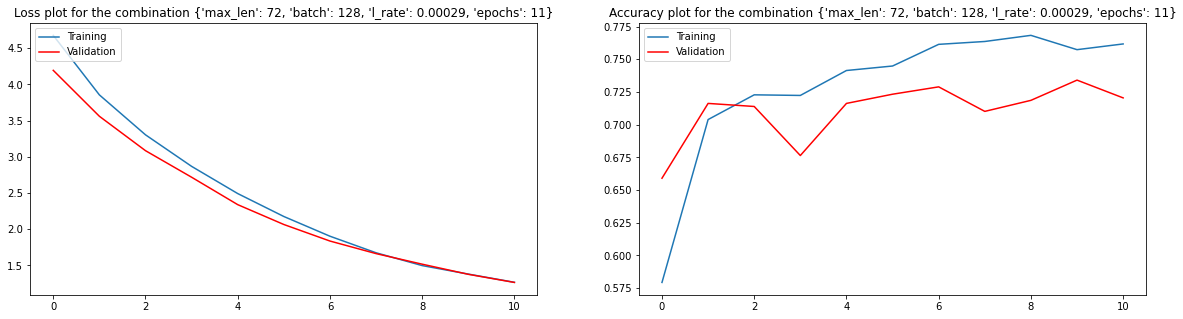

 10%|█         | 1/10 [00:39<05:57, 39.67s/it, best loss: -0.7200000286102295]

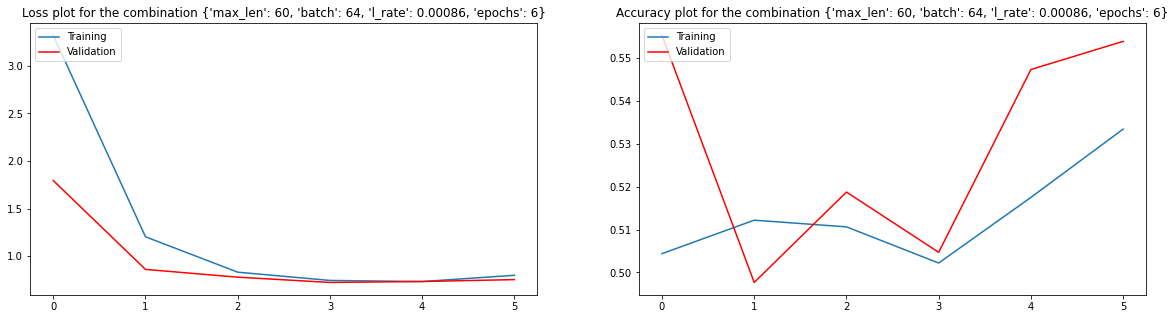

 20%|██        | 2/10 [01:18<05:14, 39.36s/it, best loss: -0.7200000286102295]

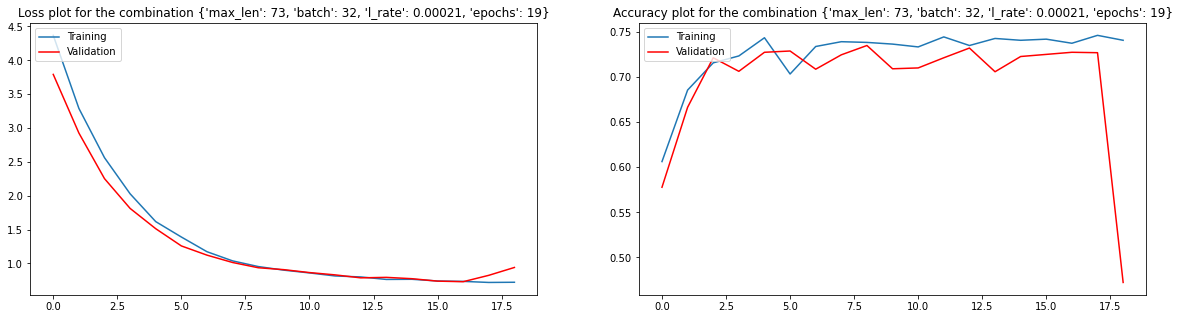

 30%|███       | 3/10 [04:29<09:54, 84.99s/it, best loss: -0.7200000286102295]

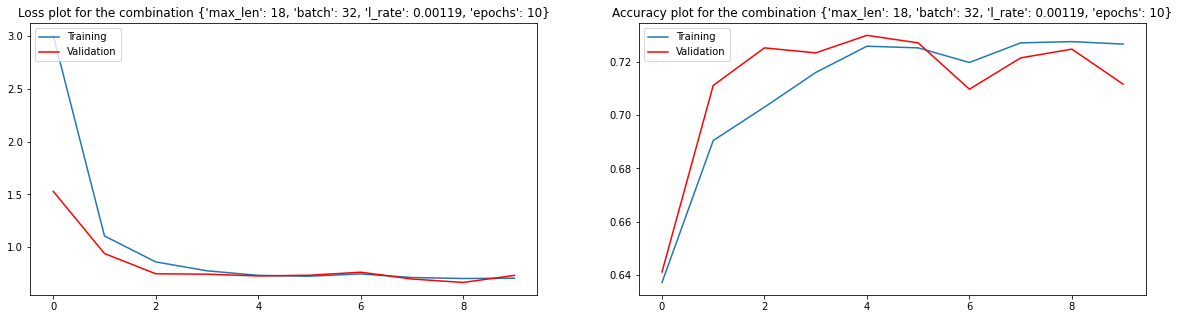

 40%|████      | 4/10 [05:14<07:16, 72.82s/it, best loss: -0.7200000286102295]

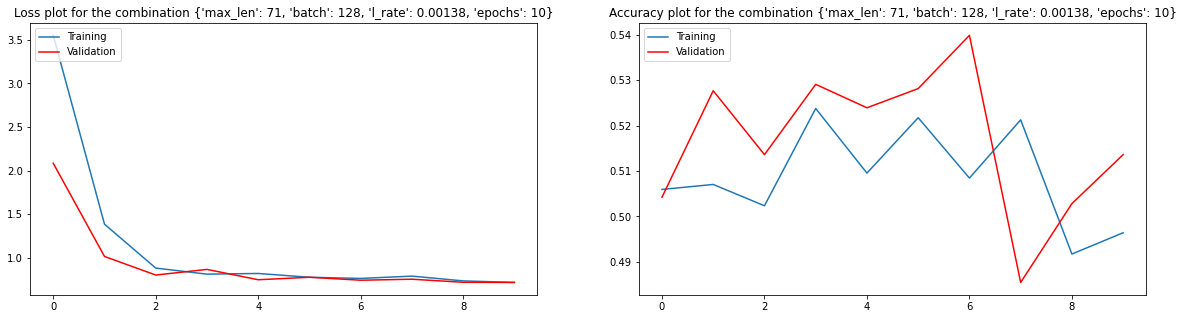

 50%|█████     | 5/10 [05:53<05:13, 62.77s/it, best loss: -0.7200000286102295]

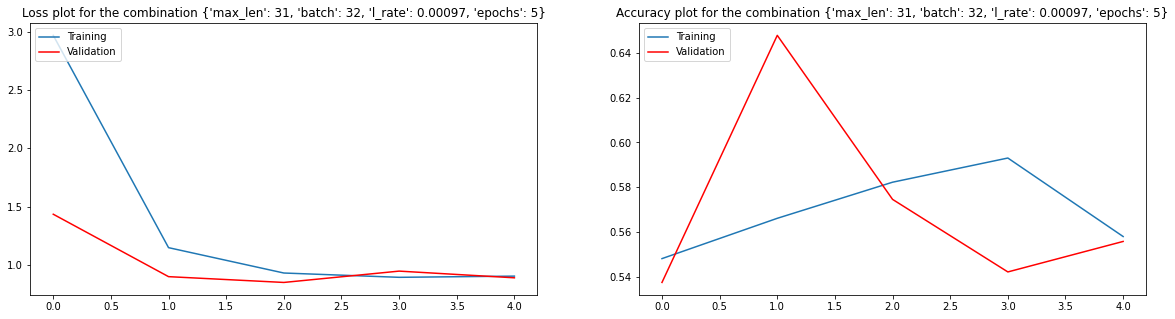

 60%|██████    | 6/10 [06:31<03:41, 55.30s/it, best loss: -0.7200000286102295]

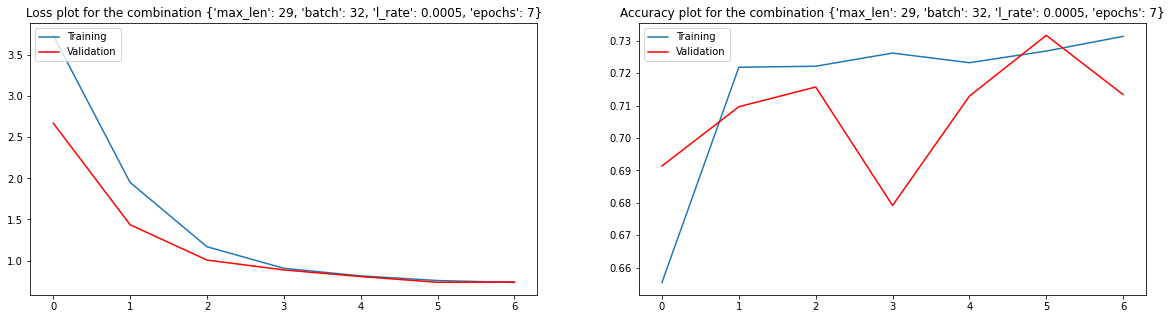

 70%|███████   | 7/10 [07:16<02:36, 52.13s/it, best loss: -0.7200000286102295]

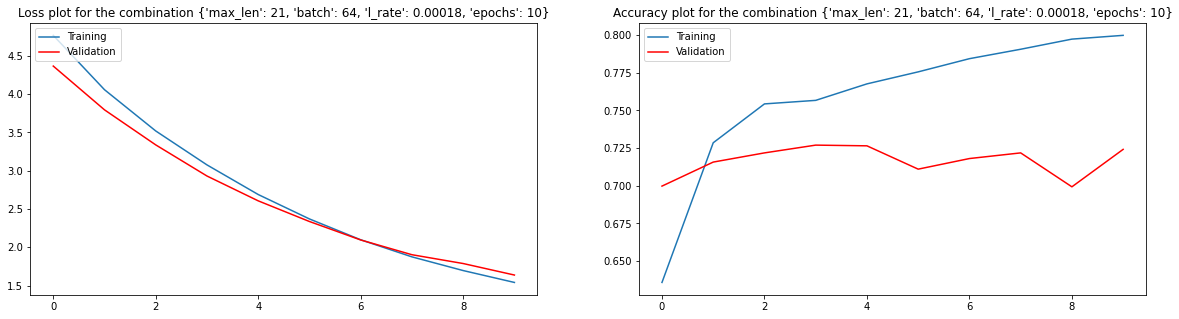

 80%|████████  | 8/10 [07:50<01:33, 46.89s/it, best loss: -0.7200000286102295]

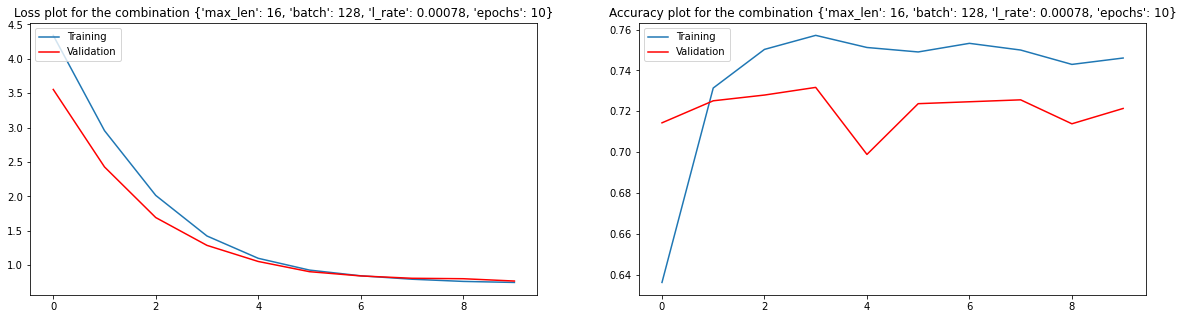

 90%|█████████ | 9/10 [08:15<00:40, 40.22s/it, best loss: -0.7200000286102295]

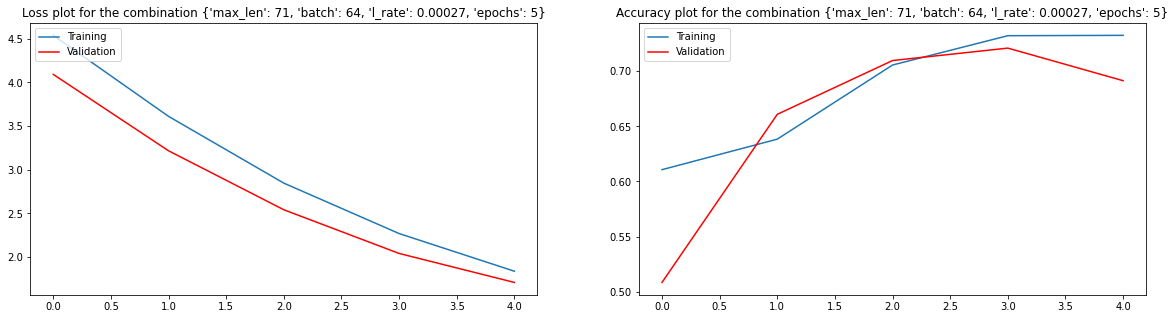

100%|██████████| 10/10 [08:56<00:00, 53.60s/it, best loss: -0.7200000286102295]
{'batch_size': 2, 'epochs': 6, 'learning_rate': 0.00028608088773589025, 'max_length': 68}


In [ ]:
def objective_func(args):
    max_length = args['max_length']
    batch_size = args['batch_size']
    learning_rate = args['learning_rate']
    epochs = args['epochs']

    
    encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
    training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')
    embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings)

    encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])
    validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding='post', truncating = 'pre')
    
    adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
    model = model_vanilla_rnn(embedding_matrix, 300, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

    history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=0, batch_size=batch_size, shuffle =True, validation_data = (validation_padded, validation['Sentiment']))
    accuracy = round(history.history['val_accuracy'][-1],2)
    u = {}
    u['max_len'] = max_length
    u['batch'] = batch_size
    u['l_rate'] = round(learning_rate,5)
    u['epochs'] = epochs

    fig, ax = plt.subplots(1,2,figsize = (20,5))

    ax[0].plot(history.history['loss'], label='Training')
    ax[0].plot(history.history['val_loss'], c='r',label='Validation')
    ax[0].legend(loc='upper left')
    ax[0].title.set_text('Loss plot for the combination ' + str(u))


    ax[1].plot(history.history['accuracy'], label='Training')
    ax[1].plot(history.history['val_accuracy'], c='r',label='Validation')
    ax[1].legend(loc='upper left')
    ax[1].title.set_text('Accuracy plot for the combination ' + str(u))  
    plt.show()

    return -round(accuracy,2)

space = {'max_length': hp.choice('max_length',range(4,75)),  
        'batch_size': hp.choice('batch_size', [32, 64, 128]),
         'epochs': hp.choice('epochs',range(5,20)), 
         'learning_rate': hp.uniform('learning_rate', 0,0.002)
        }
                                
                                
tokenise_tf = Tokenizer()
tokenise_tf.fit_on_texts(training['Doc Text'])                                
best_vanilla_rnn = fmin(objective_func, space, algo=tpe.suggest, max_evals=10)
print(best_vanilla_rnn)

# For vanilla rnn, the best hyper parameters are:
# 'batch_size': 128, 'epochs': 6, 'learning_rate': 0.0003, 'max_length': 68

In [1]:
# {'batch_size': 0, 'epochs': 7, 'max_length': 59, 'padd': 0, 'trunc': 0}

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]WARNING:tensorflow:Layer lstm_10 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


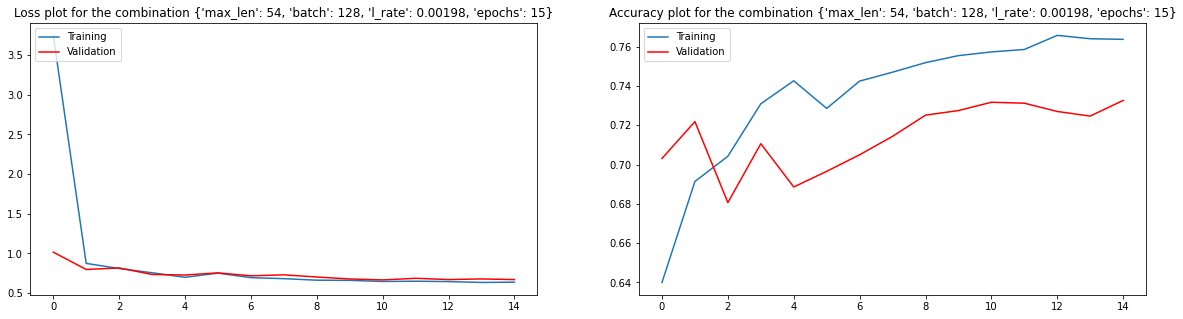

 10%|█         | 1/10 [00:51<07:46, 51.81s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_11 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


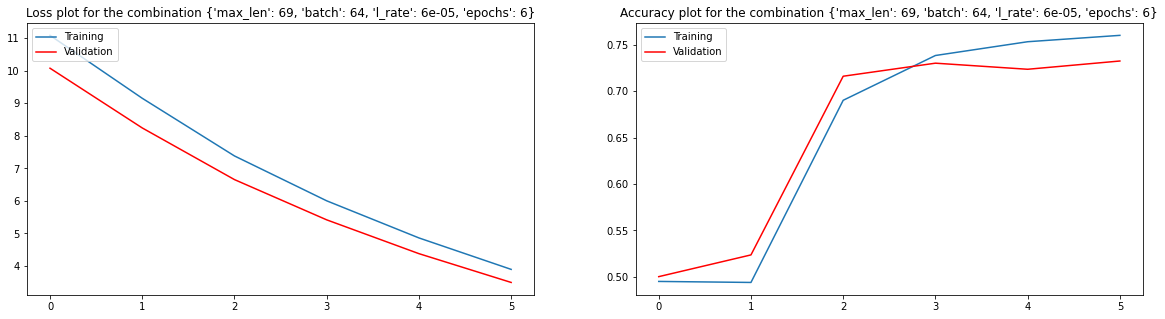

 20%|██        | 2/10 [01:42<06:52, 51.59s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_12 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


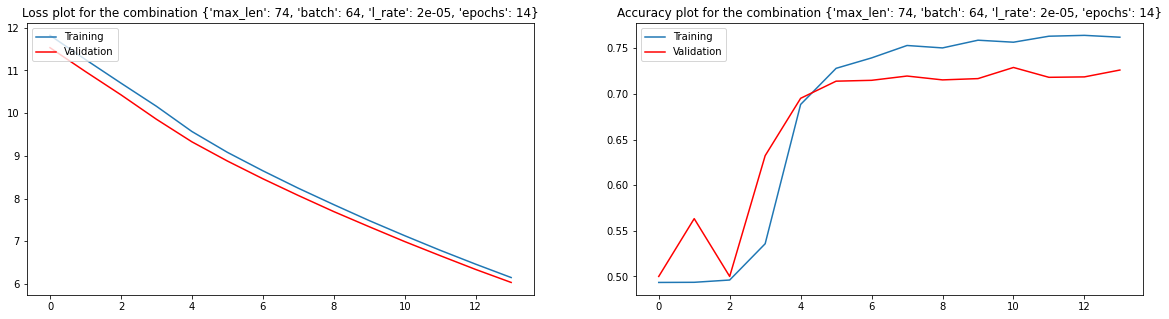

 30%|███       | 3/10 [03:22<07:41, 65.88s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_13 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


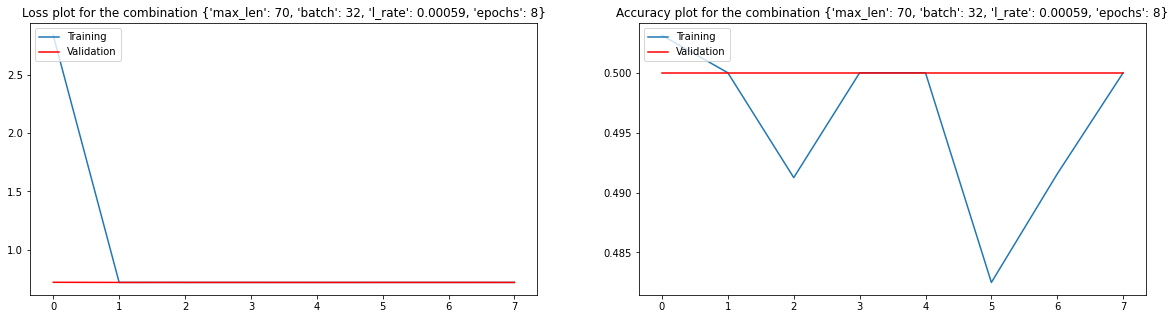

 40%|████      | 4/10 [05:06<07:44, 77.46s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_14 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


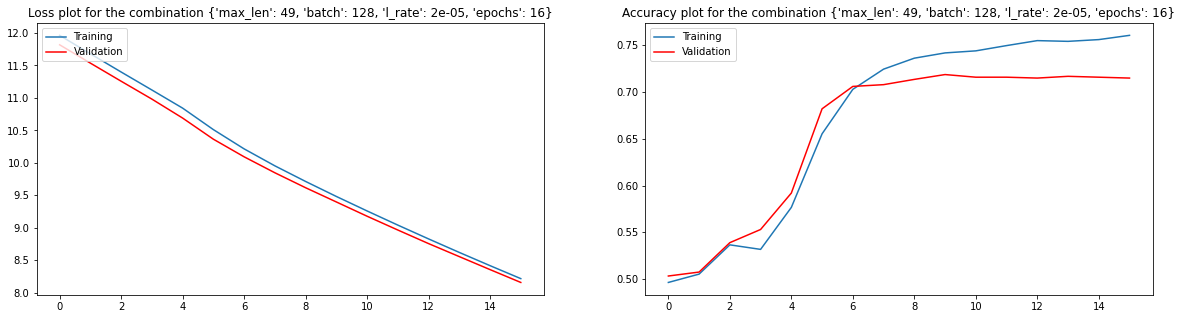

 50%|█████     | 5/10 [05:59<05:50, 70.07s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_15 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


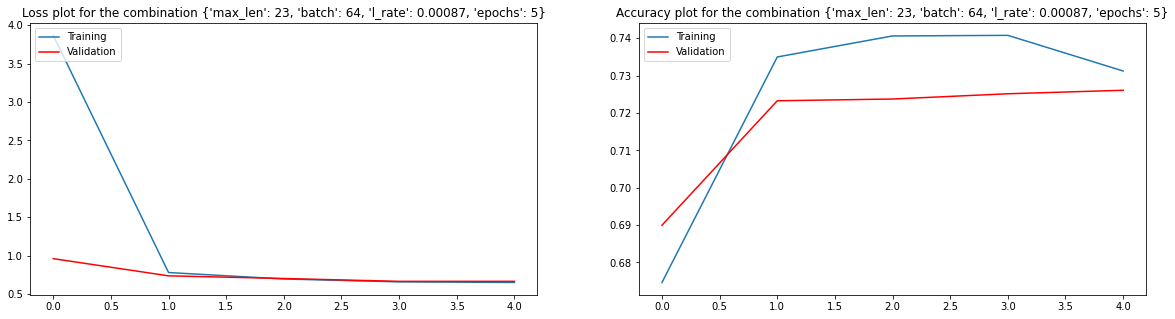

 60%|██████    | 6/10 [06:30<03:53, 58.26s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_16 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


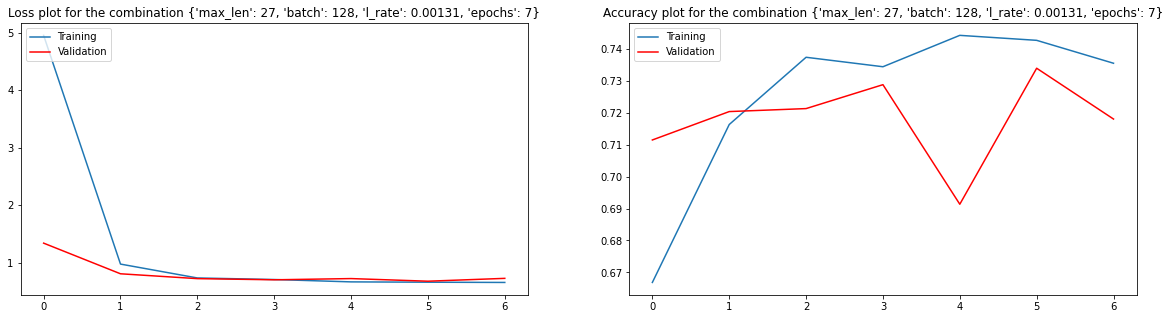

 70%|███████   | 7/10 [06:59<02:28, 49.53s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_17 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


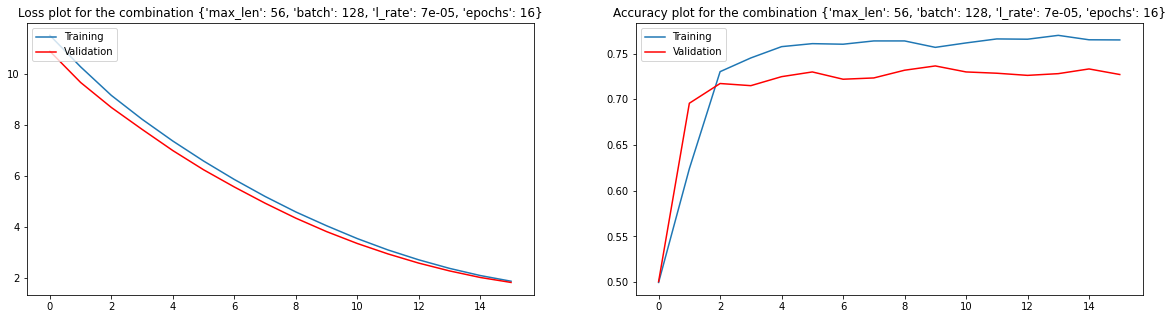

 80%|████████  | 8/10 [07:59<01:45, 52.72s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_18 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


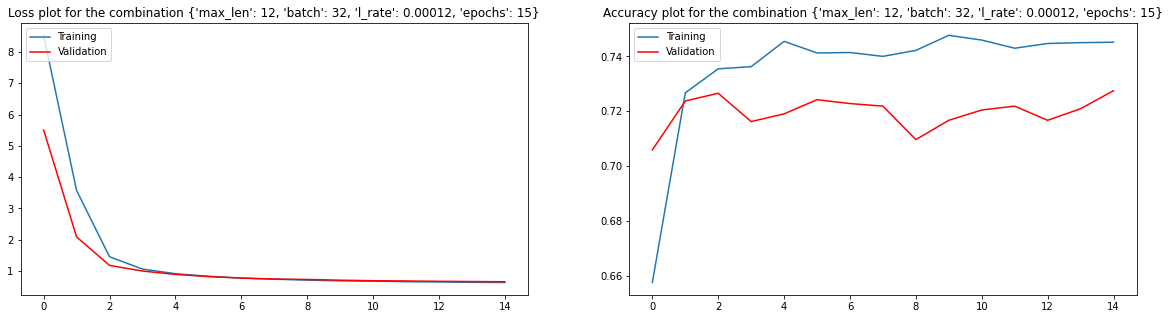

 90%|█████████ | 9/10 [09:00<00:55, 55.31s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_19 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


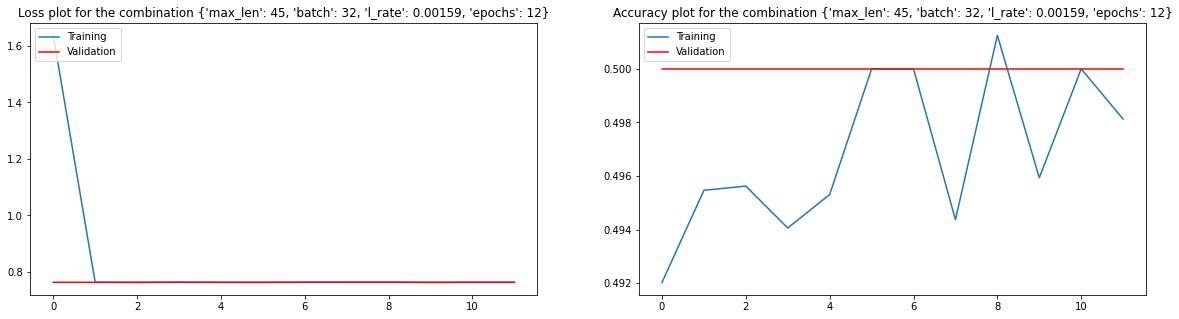

100%|██████████| 10/10 [10:50<00:00, 65.07s/it, best loss: -0.7300000190734863]
{'batch_size': 2, 'epochs': 10, 'learning_rate': 0.0019797324320253865, 'max_length': 50}


In [ ]:
def objective_func(args):
    max_length = args['max_length']
    batch_size = args['batch_size']
    learning_rate = args['learning_rate']
    epochs = args['epochs']

    
    encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
    training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')
    embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings)

    encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])
    validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding='post', truncating = 'pre')
    
    adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
    model = model_lstm(embedding_matrix, 300, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

    history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=0, batch_size=batch_size, shuffle =True, validation_data = (validation_padded, validation['Sentiment']))
    accuracy = round(history.history['val_accuracy'][-1],2)
    u = {}
    u['max_len'] = max_length
    u['batch'] = batch_size
    u['l_rate'] = round(learning_rate,5)
    u['epochs'] = epochs

    fig, ax = plt.subplots(1,2,figsize = (20,5))

    ax[0].plot(history.history['loss'], label='Training')
    ax[0].plot(history.history['val_loss'], c='r',label='Validation')
    ax[0].legend(loc='upper left')
    ax[0].title.set_text('Loss plot for the combination ' + str(u))


    ax[1].plot(history.history['accuracy'], label='Training')
    ax[1].plot(history.history['val_accuracy'], c='r',label='Validation')
    ax[1].legend(loc='upper left')
    ax[1].title.set_text('Accuracy plot for the combination ' + str(u))  
    plt.show()

    return -round(accuracy,2)

space = {'max_length': hp.choice('max_length',range(4,75)),  
        'batch_size': hp.choice('batch_size', [32, 64, 128]),
         'epochs': hp.choice('epochs',range(5,20)), 
         'learning_rate': hp.uniform('learning_rate', 0,0.002)
        }             
                                
tokenise_tf = Tokenizer()
tokenise_tf.fit_on_texts(training['Doc Text'])                                
best_lstm = fmin(objective_func, space, algo=tpe.suggest, max_evals=10)
print(best_lstm)

# For LSTM rnn, the best hyper parameters are:
# 'batch_size': 128, 'epochs': 10, 'learning_rate': 0.002, 'max_length': 50

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]WARNING:tensorflow:Layer gru will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


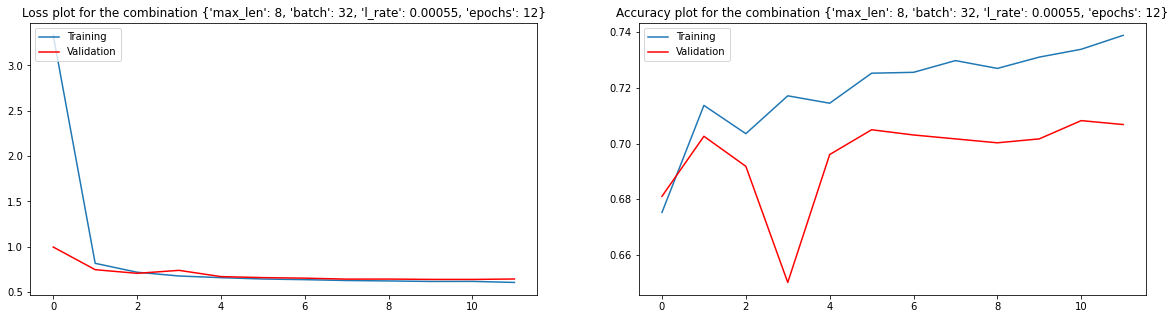

 10%|█         | 1/10 [00:50<07:30, 50.04s/it, best loss: -0.7099999785423279]WARNING:tensorflow:Layer gru_1 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


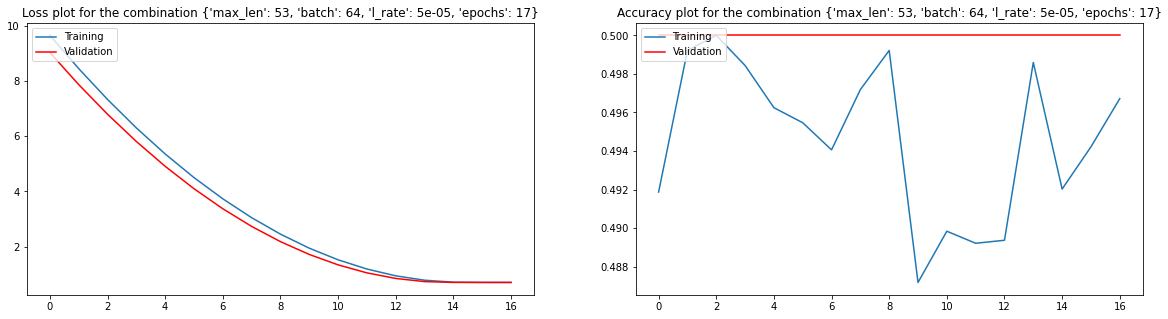

 20%|██        | 2/10 [02:35<08:54, 66.81s/it, best loss: -0.7099999785423279]WARNING:tensorflow:Layer gru_2 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


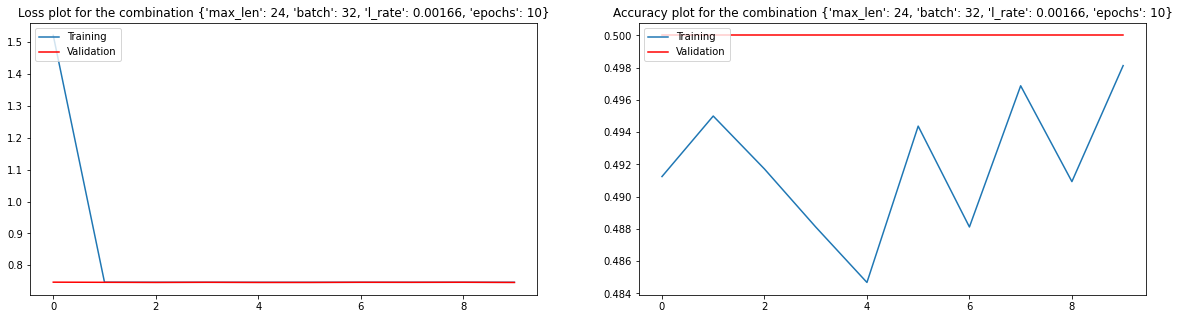

 30%|███       | 3/10 [03:47<07:57, 68.20s/it, best loss: -0.7099999785423279]WARNING:tensorflow:Layer gru_3 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


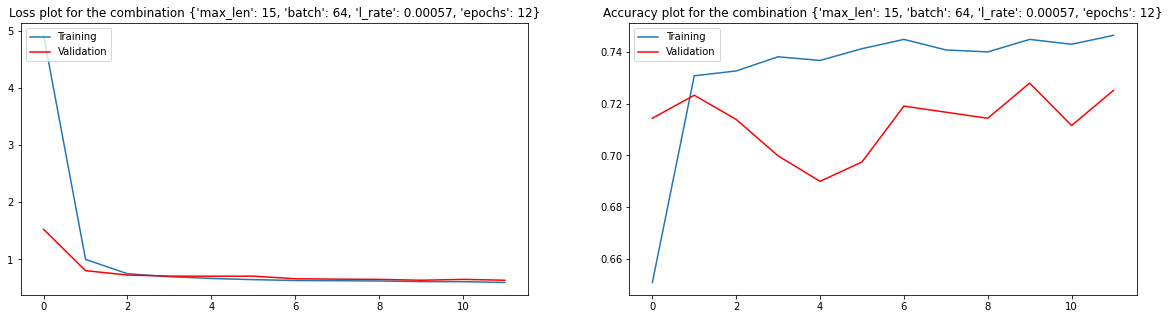

 40%|████      | 4/10 [04:31<06:06, 61.05s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer gru_4 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


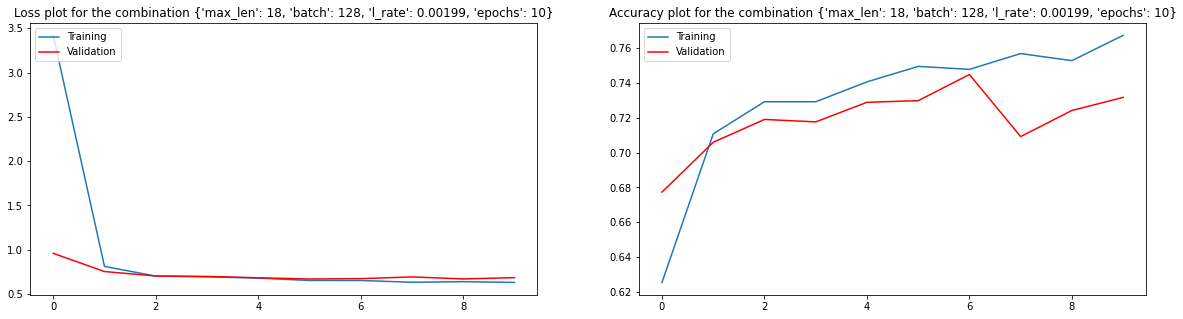

 50%|█████     | 5/10 [05:06<04:25, 53.05s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer gru_5 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


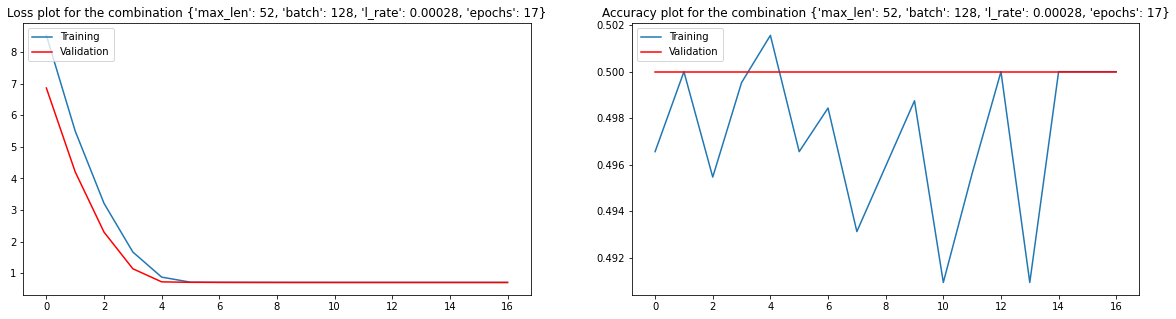

 60%|██████    | 6/10 [06:13<03:49, 57.27s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer gru_6 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


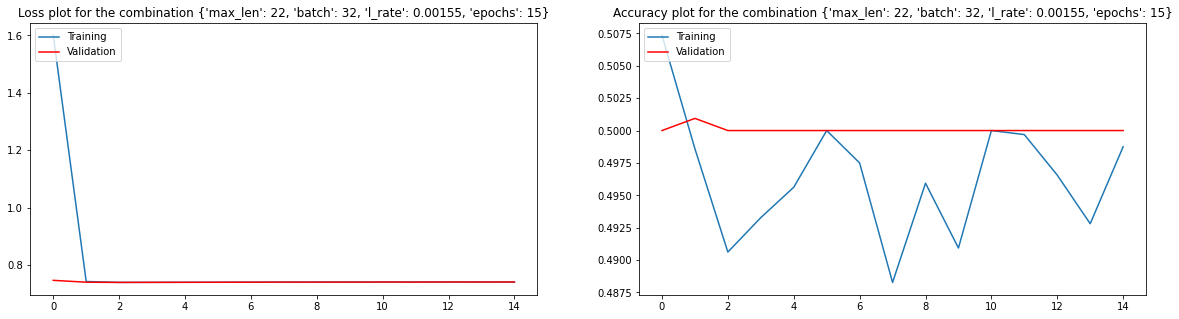

 70%|███████   | 7/10 [07:44<03:22, 67.51s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer gru_7 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


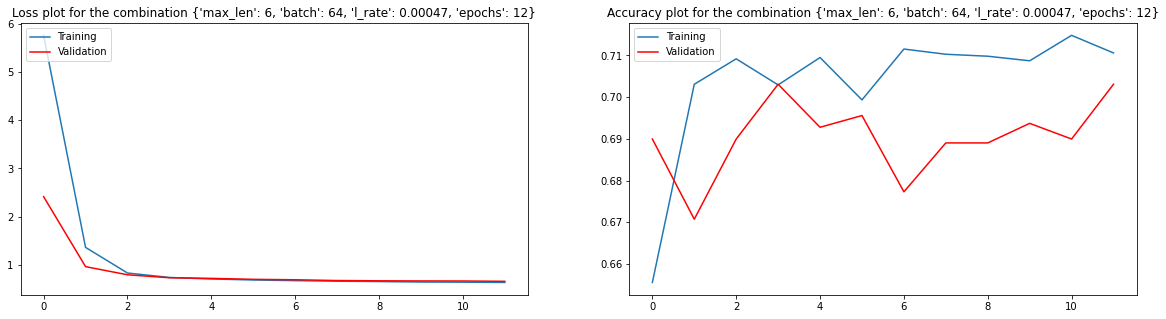

 80%|████████  | 8/10 [08:21<01:56, 58.28s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer gru_8 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


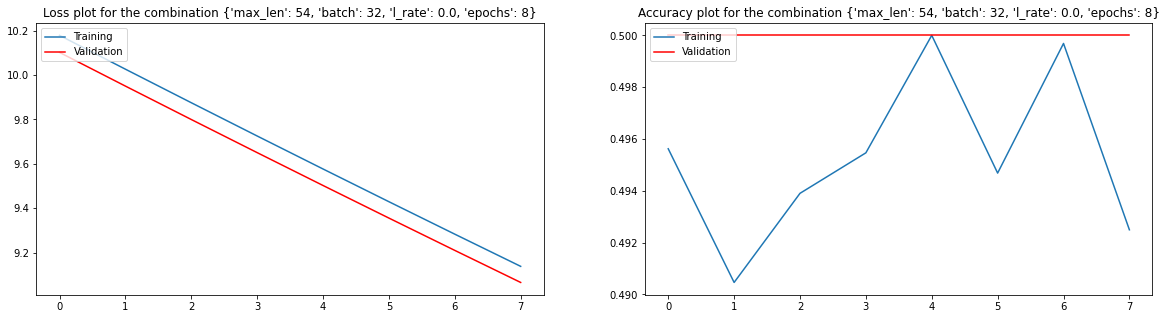

 90%|█████████ | 9/10 [10:06<01:12, 72.35s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer gru_9 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


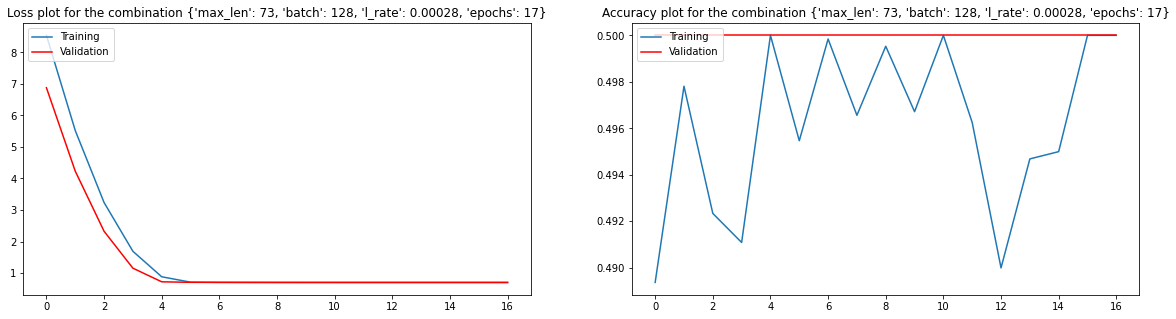

100%|██████████| 10/10 [11:27<00:00, 68.73s/it, best loss: -0.7300000190734863]
{'batch_size': 1, 'epochs': 7, 'learning_rate': 0.0005705035153556523, 'max_length': 11}


In [ ]:
def objective_func(args):
    max_length = args['max_length']
    batch_size = args['batch_size']
    learning_rate = args['learning_rate']
    epochs = args['epochs']
    
    encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
    training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')

    embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings)

    encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])
    validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding='post', truncating = 'pre') 
    
    adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
    model = model_gru(embedding_matrix, 300, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

    history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=0, batch_size=batch_size, shuffle =True, validation_data = (validation_padded, validation['Sentiment']))
    accuracy = history.history['val_accuracy'][-1]
    u = {}
    u['max_len'] = max_length
    u['batch'] = batch_size
    u['l_rate'] = round(learning_rate,5)
    u['epochs'] = epochs

    fig, ax = plt.subplots(1,2,figsize = (20,5))

    ax[0].plot(history.history['loss'], label='Training')
    ax[0].plot(history.history['val_loss'], c='r',label='Validation')
    ax[0].legend(loc='upper left')
    ax[0].title.set_text('Loss plot for the combination ' + str(u))


    ax[1].plot(history.history['accuracy'], label='Training')
    ax[1].plot(history.history['val_accuracy'], c='r',label='Validation')
    ax[1].legend(loc='upper left')
    ax[1].title.set_text('Accuracy plot for the combination ' + str(u))  
    plt.show()

#     encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])

#     validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding=padd, truncating = trunc)
#     loss, accuracy = model.evaluate(validation_padded, validation['Sentiment'], verbose=0)
    return -round((accuracy),2)

space = {'max_length': hp.choice('max_length',range(4,75)),  
        'batch_size': hp.choice('batch_size', [32, 64, 128]),
         'epochs': hp.choice('epochs',range(5,20)), 
         'learning_rate': hp.uniform('learning_rate', 0,0.002)
        }
                                
                                
tokenise_tf = Tokenizer()
tokenise_tf.fit_on_texts(training['Doc Text'])                                
best_gru = fmin(objective_func, space, algo=tpe.suggest, max_evals=10)
print(best_gru)

# For GRU rnn, the best hyper parameters are:
# 'batch_size': 64, 'epochs': 7, 'learning_rate': 0.0006, 'max_length': 11

In [ ]:
# max_length = 40
# epochs = 15
# batch_size = 64
# learning_rate = 0.001

# encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
# training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')
# embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings)

# encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])
# validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding='post', truncating = 'pre')

# adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
# model = model_vanilla_rnn(embedding_matrix, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

# history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=2, batch_size=batch_size, shuffle =True, validation_data = (validation_padded, validation['Sentiment']))
# accuracy = history.history['val_accuracy'][-1]



# Experimenting with the Network Architecture

## Using the Final hidden state as the output

## max_length = 40
## epochs = 15
## batch_size = 64
## learning_rate = 0.001

In [31]:

def par_selec(model_r, max_length, nnh):
  # max_length = 40
  epochs = 15
  batch_size = 64
  learning_rate = 0.001

  tokenise_tf = Tokenizer()
  tokenise_tf.fit_on_texts(training['Doc Text']) 

  encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
  training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')

  embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings)

  encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])
  validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding='post', truncating = 'pre')


  adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
  model = model_r(embedding_matrix, nnh, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

  history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=0, batch_size=batch_size, shuffle =True, validation_data = (validation_padded, validation['Sentiment']))
  accuracy = history.history['val_accuracy'][-1]

  u = {}
  u['max_len'] = max_length
  u['batch'] = batch_size
  u['l_rate'] = learning_rate
  u['epochs'] = epochs

  fig, ax = plt.subplots(1,2,figsize = (20,5))

  ax[0].plot(history.history['loss'], label='Training')
  ax[0].plot(history.history['val_loss'], c='r',label='Validation')
  ax[0].legend(loc='upper left')
  ax[0].title.set_text('Loss plot for the combination ' + str(u))


  ax[1].plot(history.history['accuracy'], label='Training')
  ax[1].plot(history.history['val_accuracy'], c='r',label='Validation')
  ax[1].legend(loc='upper left')
  ax[1].title.set_text('Accuracy plot for the combination ' + str(u))  
  plt.show()

  print('Accuracy for ' + str(nnh) + ' hidden units ' + str(max_length) + ' sequence length: ' + str(accuracy))


## Changing the no of hidden units
## Keeping max_length = 40
## epochs = 15
## batch_size = 64
## learning_rate = 0.001


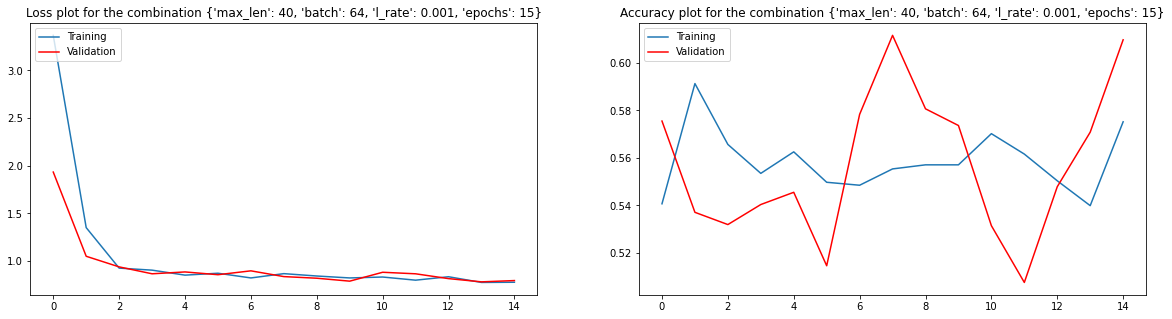

Accuracy for 300 hidden units 40 sequence length: 0.6097561


In [ ]:
par_selec(model_vanilla_rnn, 40, 300)

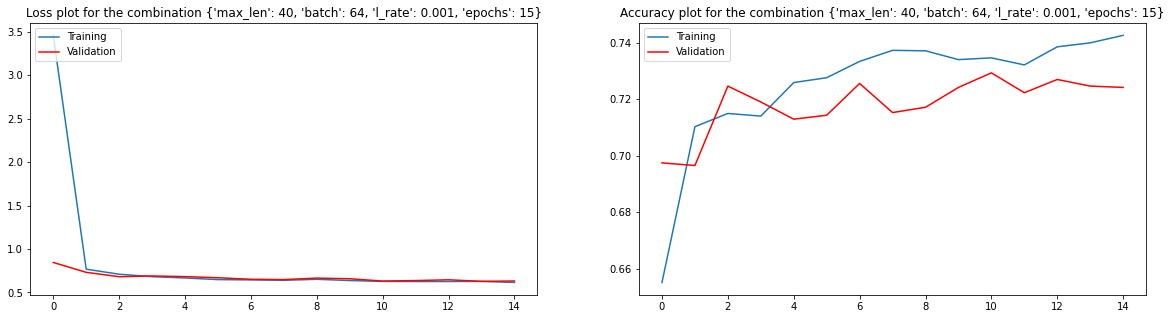

Accuracy for 300 hidden units 40 sequence length: 0.72420263


In [ ]:
par_selec(model_lstm, 40, 300)

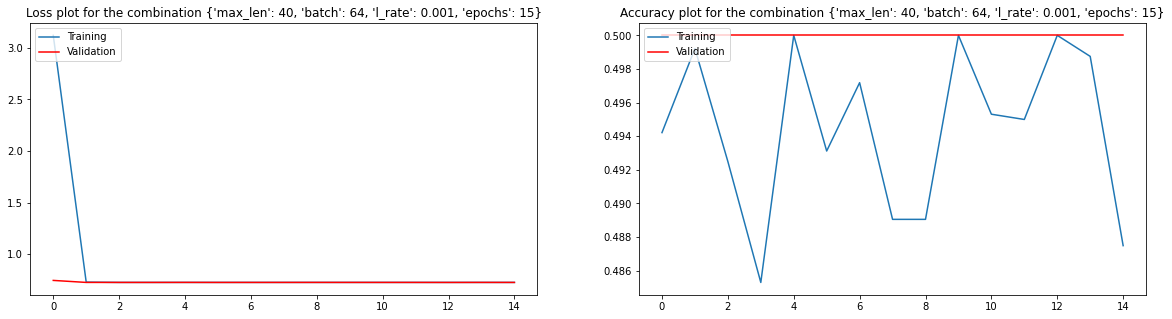

Accuracy for 300 hidden units 40 sequence length: 0.5


In [ ]:
par_selec(model_gru, 40, 300)

## Doubling the no of hidden units

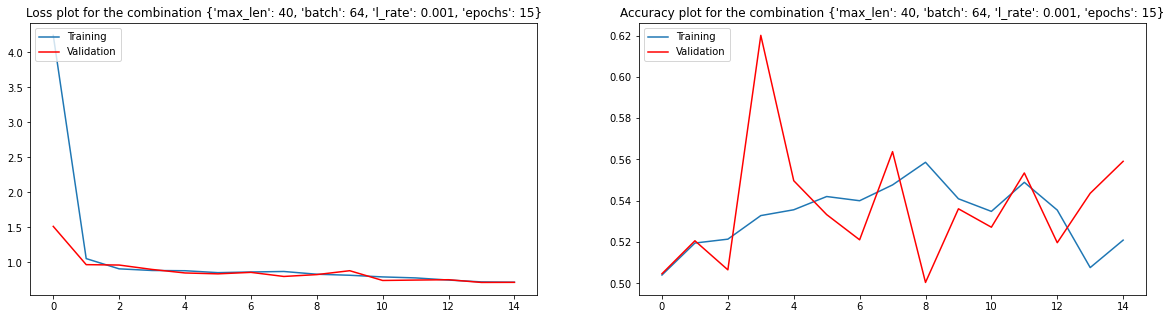

Accuracy for 600 hidden units 40 sequence length: 0.55909944


In [ ]:
par_selec(model_vanilla_rnn, 40, 600)

### For Vanilla RNN,  With double the no of hidden units, the accuracy reduced from 60 to 56 percent.

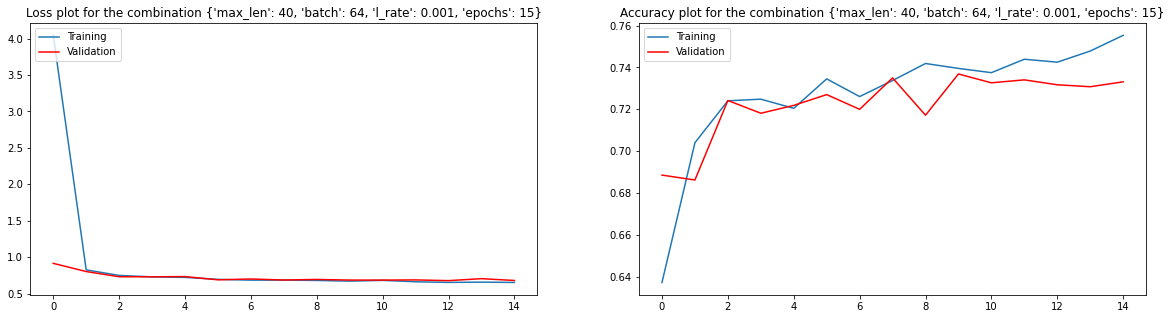

Accuracy for 600 hidden units 40 sequence length: 0.7331144


In [ ]:
par_selec(model_lstm, 40, 600)

### For LSTM, With double the no of hidden units, the accuracy slightly increased from 72 to 73 percent.

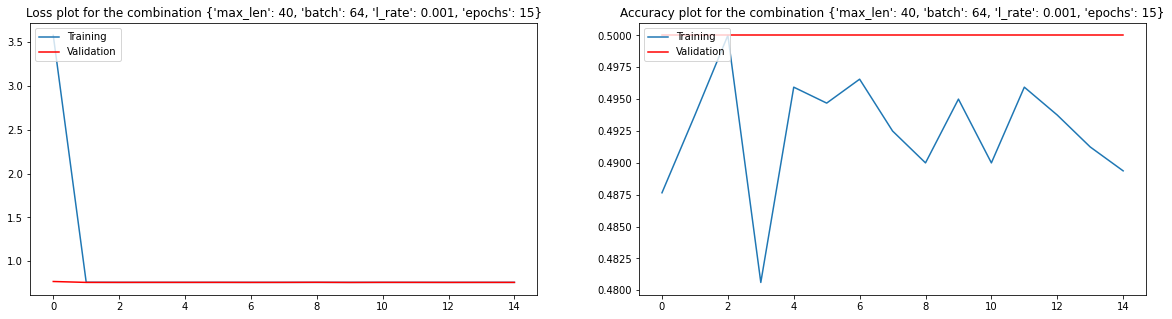

Accuracy for 600 hidden units 40 sequence length: 0.5


In [ ]:
par_selec(model_gru, 40, 600)

### For GRU, With double the no of hidden units, the accuracy didn't change from 50

# Halving the no of hidden units

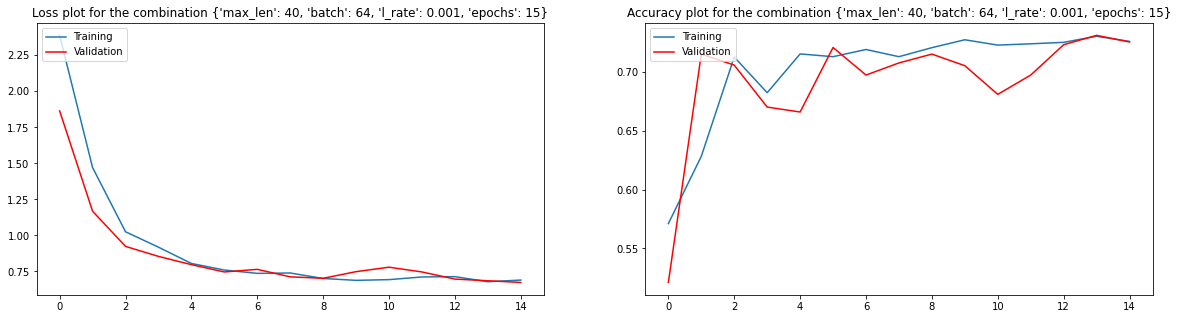

Accuracy for 150 hidden units 40 sequence length: 0.7256098


In [ ]:
par_selec(model_vanilla_rnn, 40, 150)

### With halve the no of hidden units, the accuracy increased from 60 to 73.

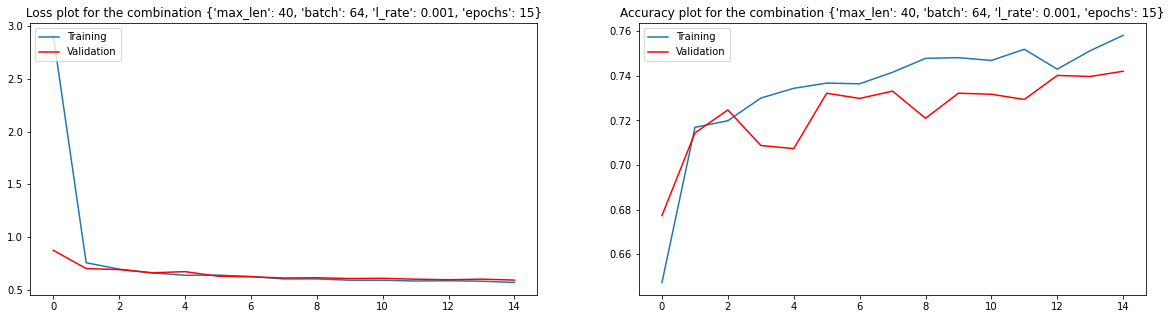

Accuracy for 150 hidden units 40 sequence length: 0.74202627


In [ ]:
par_selec(model_lstm, 40, 150)

### For LSTM, With halve the no of hidden units, the accuracy increased from 72 to 74 percent.

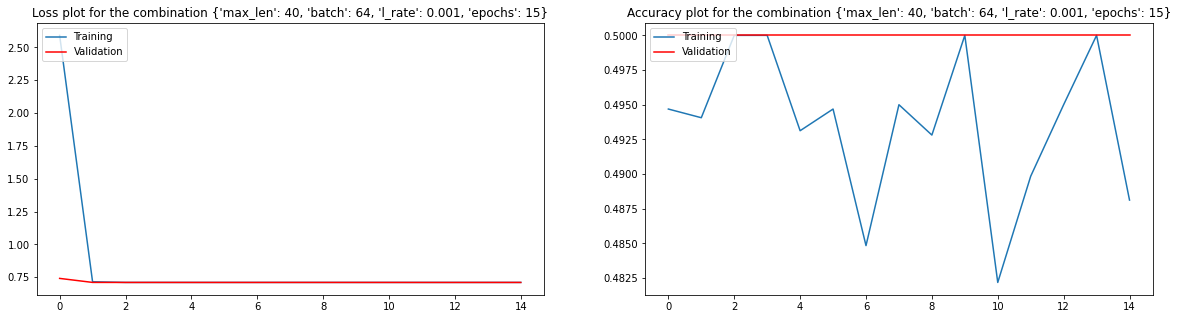

Accuracy for 150 hidden units 40 sequence length: 0.5


In [ ]:
par_selec(model_gru, 40, 150)

### For GRU, With halve the no of hidden units, the accuracy remain unchanged.

# Changing the max_length 
# Keeping no of hidden units = 300
# epochs = 15
# batch_size = 64
# learning_rate = 0.001


## Doubling the sequence length from 40 to 80

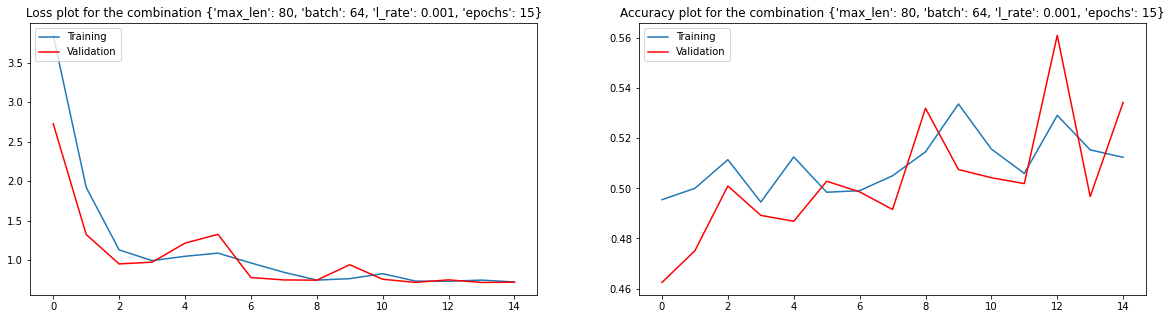

Accuracy for 300 hidden units 80 sequence length: 0.5342401


In [ ]:
par_selec(model_vanilla_rnn, 80, 300)

### For vanilla rnn, With double the sequence length, there was a decrease in accuracy from 60 to 53



Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


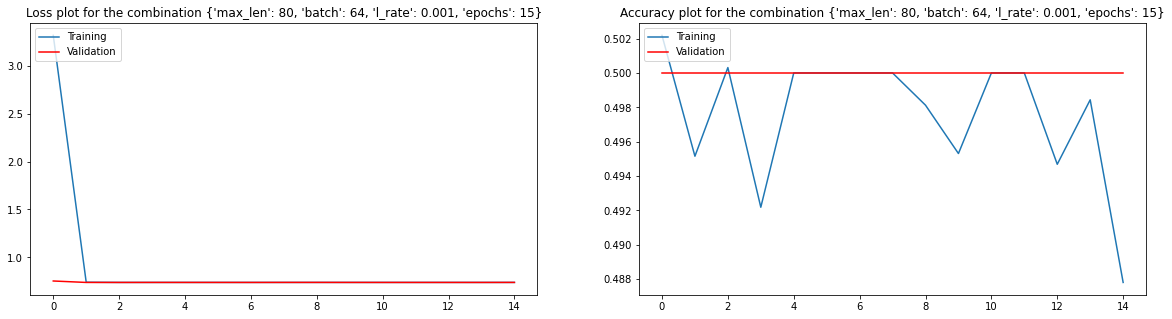

Accuracy for 300 hidden units 80 sequence length: 0.5


In [32]:
par_selec(model_lstm, 80, 300)

### For LSTM, With double the sequence length, there was a decrease in accuracy from 72 to 50



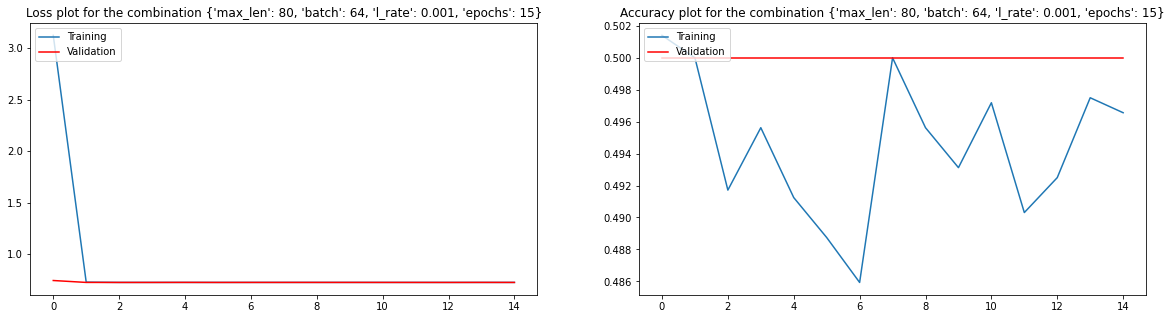

Accuracy for 300 hidden units 80 sequence length: 0.5


In [33]:
par_selec(model_gru, 80, 300)

### For GRU, With double the sequence length, there was no change in accuracy from 50



# When we increase the sequence length we might include noisy (unimportant) words that would change the sentiment of the sentence


## Halving the sequence length from 40 to 20

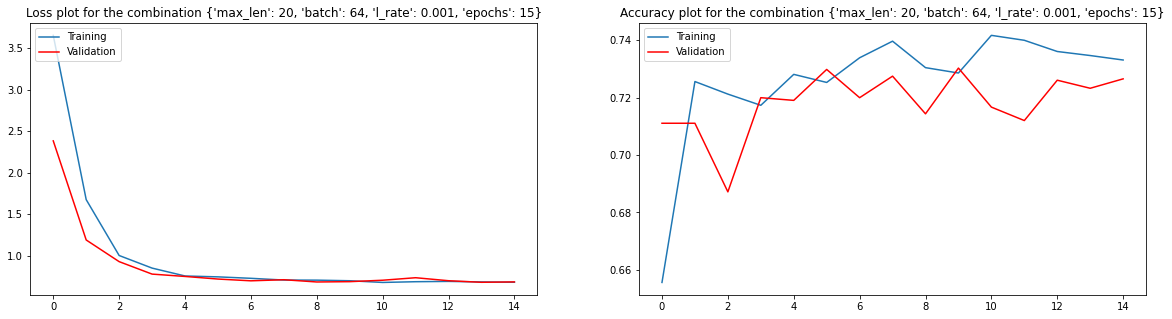

Accuracy for 300 hidden units 20 sequence length: 0.72654784


In [ ]:
par_selec(model_vanilla_rnn, 20, 300)

### For vanilla RNN, With half the sequence length, there was an increase in accuracy from 60 to 73


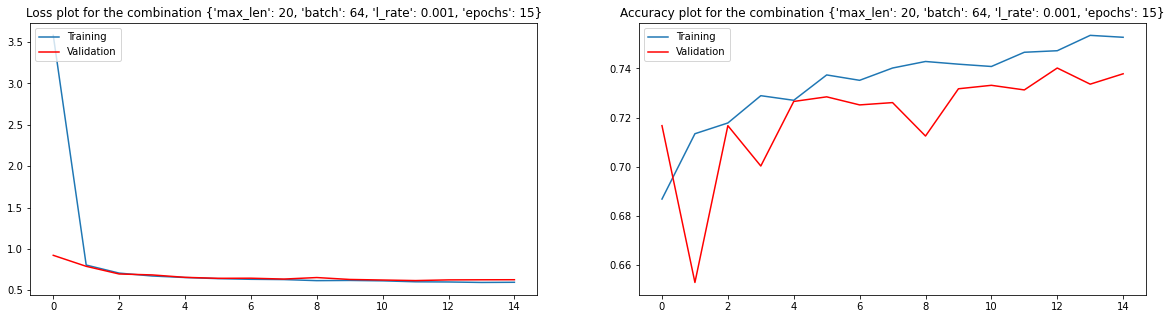

Accuracy for 300 hidden units 20 sequence length: 0.7378049


In [ ]:
par_selec(model_lstm, 20, 300)

### For LSTM, With half the sequence length, the accuracy increased from 72 to 74 percent.


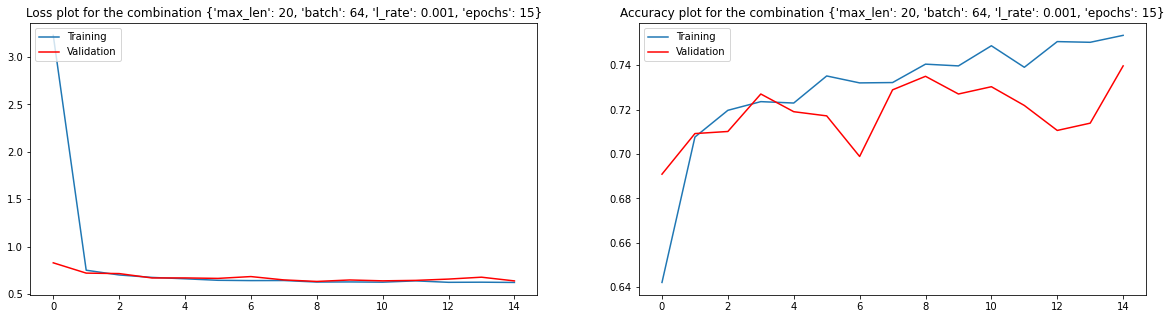

Accuracy for 300 hidden units 20 sequence length: 0.73968107


In [ ]:
par_selec(model_gru, 20, 300)

### For GRU, With half the sequence length, the accuracy increased from 50 to 74 percent.



## It makes sense as when we decrease the sequence length we might concentrate more on the important words that change the sentiment of the sentence

###

## Fine tuning the word embeddings of 300 dimensions using mittens library

In [ ]:
def finetune(training): 
  training_tokens = [word_tokenize(i) for i in training['Doc Text']]
  #training_tokens

  oov = [j for i in training_tokens for j in i if j not in embeddings.keys()]
  print(len(oov))

  corp_vocab = list(set(oov))

  cv = CountVectorizer(ngram_range=(1,1), vocabulary=corp_vocab)
  trr =''
  for i in training_tokens:
    for j in i:
      trr+= j
      trr += ' '

  # print(trr)
  # print(z)
  X = cv.fit_transform([trr])
  Xc = (X.T * X)
  Xc.setdiag(0)
  coocc_ar = Xc.toarray()

  mittens_model = Mittens(n=300, max_iter=1000)

  new_embeddings = mittens_model.fit(
      coocc_ar,
      vocab=corp_vocab,
      initial_embedding_dict= embeddings)

  new_embeddings = dict(zip(corp_vocab, new_embeddings))
  return training_tokens, new_embeddings
  


In [ ]:
embeddings2= embeddings.copy()

training_tokens, new_embeddings = finetune(training)
embeddings2.update(new_embeddings)

558


/usr/local/lib/python3.6/dist-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Iteration 1000: loss: 0.025447897613048553

In [ ]:
oov2 = [j for i in training_tokens for j in i if j not in embeddings2.keys()]
print(len(oov2))

0


### Using new embeddings for the vanilla rnn em

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


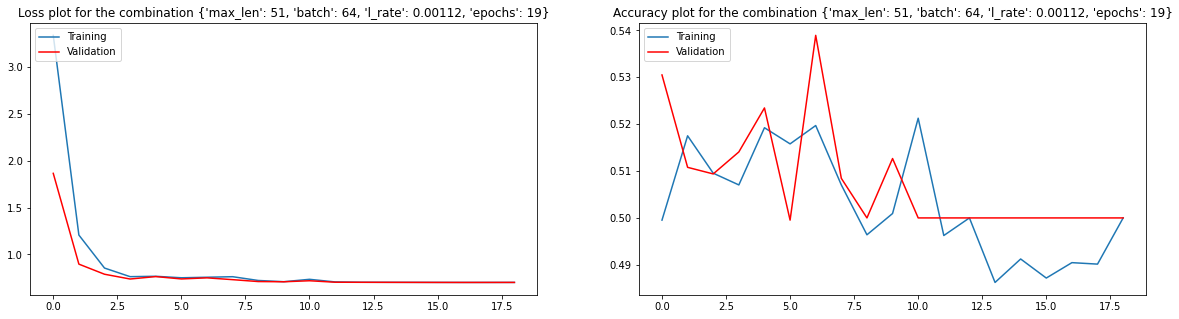

 10%|█         | 1/10 [04:09<37:21, 249.07s/it, best loss: -0.5]

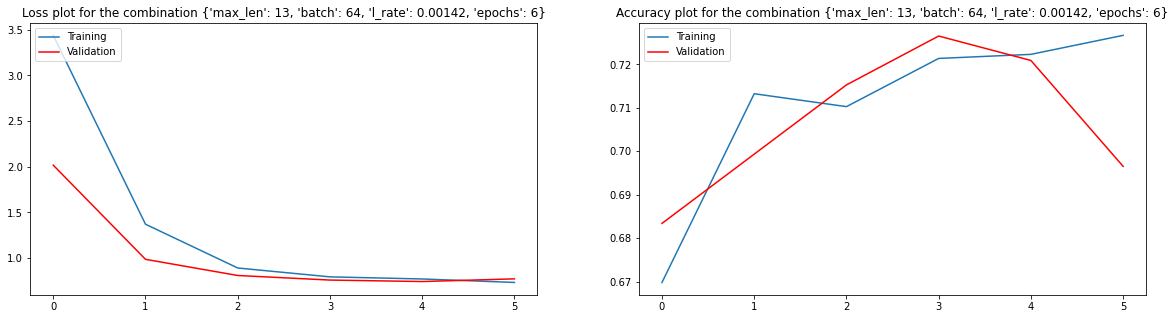

 20%|██        | 2/10 [04:33<24:12, 181.60s/it, best loss: -0.699999988079071]

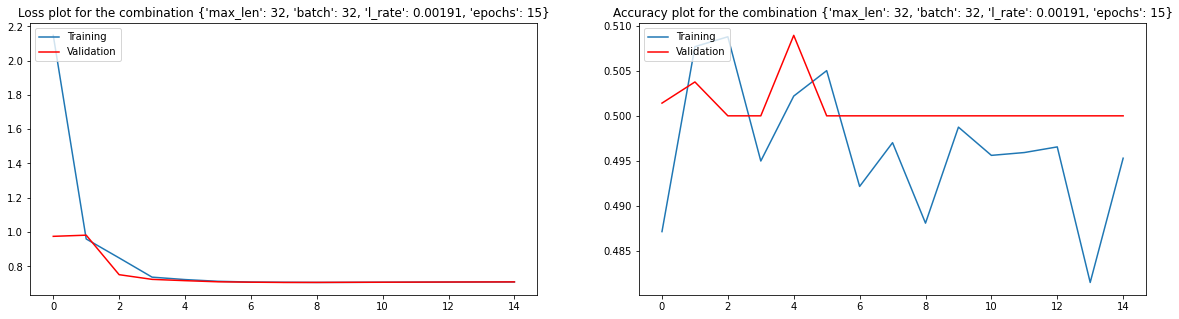

 30%|███       | 3/10 [08:44<23:38, 202.58s/it, best loss: -0.699999988079071]

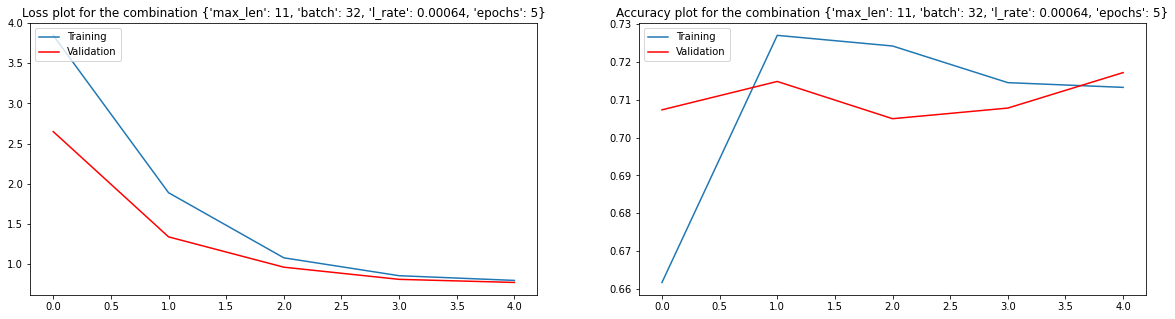

 40%|████      | 4/10 [09:20<15:14, 152.48s/it, best loss: -0.7200000286102295]

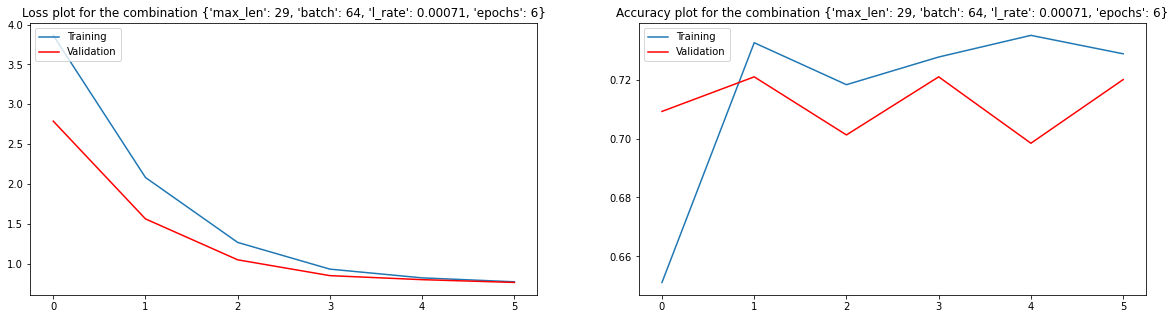

 50%|█████     | 5/10 [10:09<10:07, 121.50s/it, best loss: -0.7200000286102295]

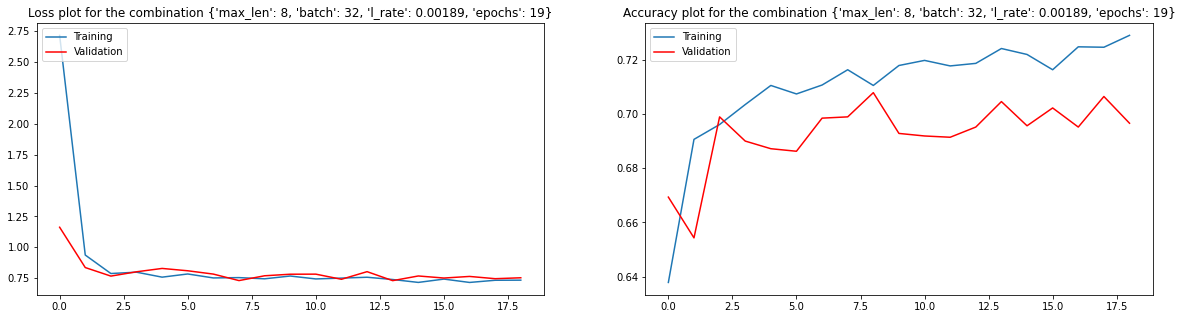

 60%|██████    | 6/10 [11:52<07:43, 116.00s/it, best loss: -0.7200000286102295]

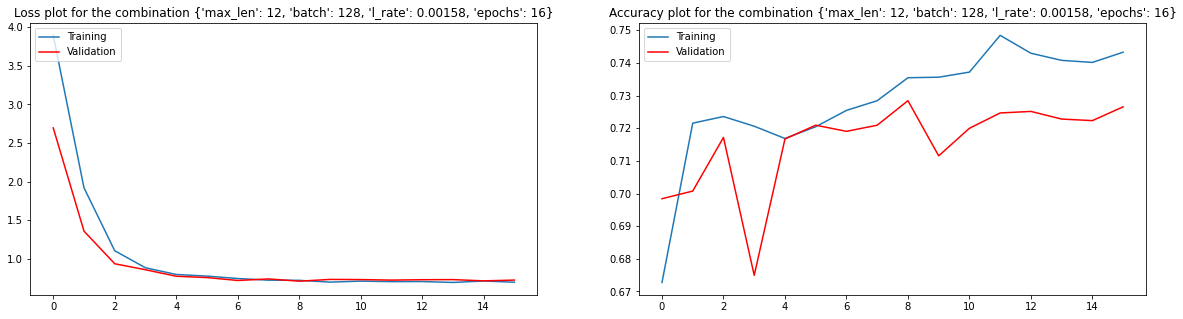

 70%|███████   | 7/10 [12:23<04:31, 90.44s/it, best loss: -0.7300000190734863] 

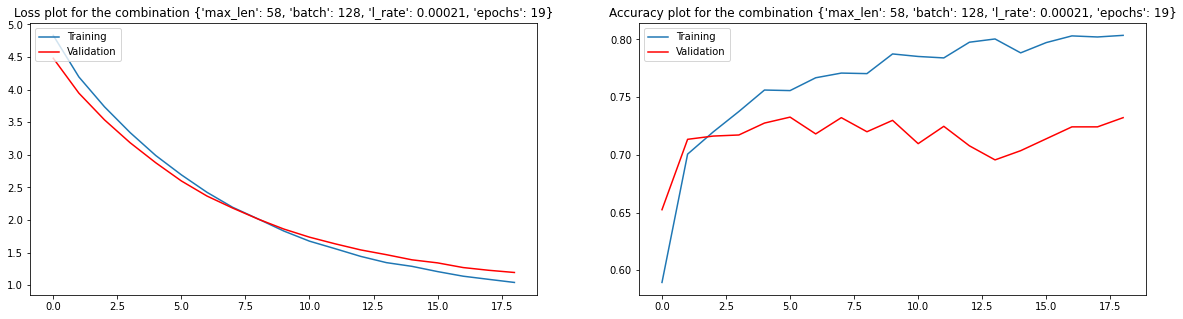

 80%|████████  | 8/10 [14:49<03:34, 107.18s/it, best loss: -0.7300000190734863]

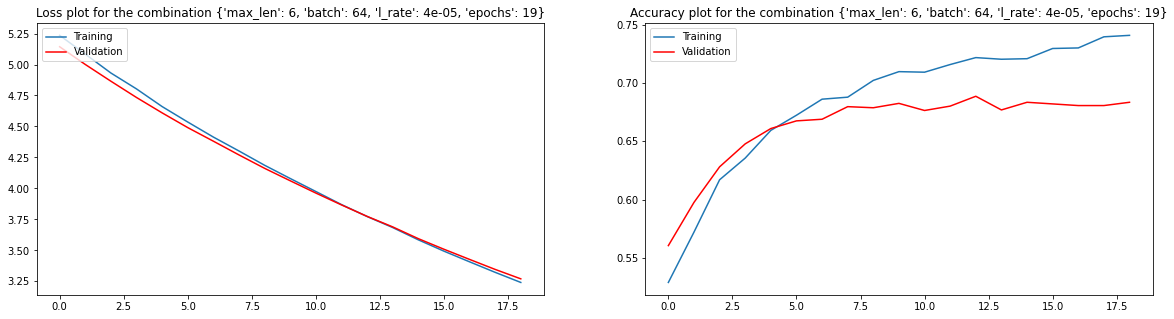

 90%|█████████ | 9/10 [15:32<01:27, 87.90s/it, best loss: -0.7300000190734863] 

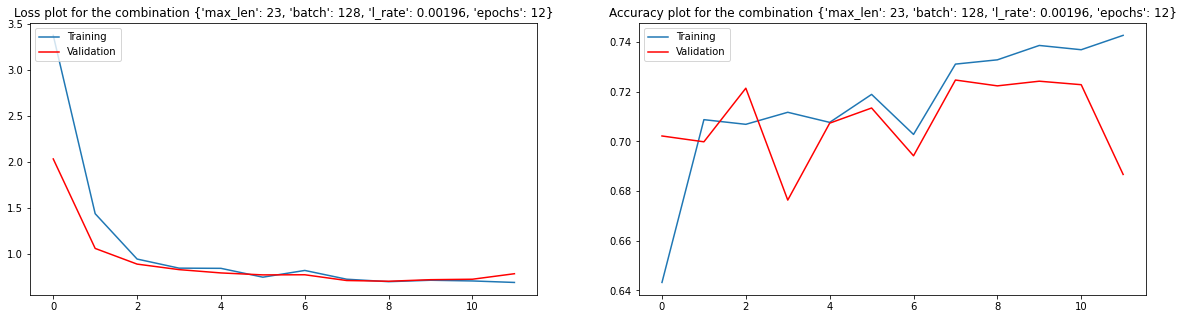

100%|██████████| 10/10 [16:13<00:00, 97.33s/it, best loss: -0.7300000190734863]
{'batch_size': 2, 'epochs': 11, 'learning_rate': 0.0015797243895363927, 'max_length': 8}


In [ ]:
def objective_func(args):
    max_length = args['max_length']
    batch_size = args['batch_size']
    learning_rate = args['learning_rate']
    epochs = args['epochs']

    
    encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
    training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')

    embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings2)

    encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])
    validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding='post', truncating = 'pre') 
    
    adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
    model = model_vanilla_rnn(embedding_matrix, 300, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

    history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=0, batch_size=batch_size, shuffle =True, validation_data = (validation_padded, validation['Sentiment']))
    accuracy = history.history['val_accuracy'][-1]
    u = {}
    u['max_len'] = max_length
    u['batch'] = batch_size
    u['l_rate'] = round(learning_rate,5)
    u['epochs'] = epochs

    fig, ax = plt.subplots(1,2,figsize = (20,5))

    ax[0].plot(history.history['loss'], label='Training')
    ax[0].plot(history.history['val_loss'], c='r',label='Validation')
    ax[0].legend(loc='upper left')
    ax[0].title.set_text('Loss plot for the combination ' + str(u))


    ax[1].plot(history.history['accuracy'], label='Training')
    ax[1].plot(history.history['val_accuracy'], c='r',label='Validation')
    ax[1].legend(loc='upper left')
    ax[1].title.set_text('Accuracy plot for the combination ' + str(u))  
    plt.show()

#     encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])

#     validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding=padd, truncating = trunc)
#     loss, accuracy = model.evaluate(validation_padded, validation['Sentiment'], verbose=0)
    return -round(accuracy,2)

space = {'max_length': hp.choice('max_length',range(4,75)),  
        'batch_size': hp.choice('batch_size', [32, 64, 128]),
         'epochs': hp.choice('epochs',range(5,20)), 
         'learning_rate': hp.uniform('learning_rate', 0,0.002)
        }
                                
                                
tokenise_tf = Tokenizer()
tokenise_tf.fit_on_texts(training['Doc Text'])                                
best_vanilla_rnn2 = fmin(objective_func, space, algo=tpe.suggest, max_evals=10)
print(best_vanilla_rnn2)

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]WARNING:tensorflow:Layer lstm_5 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


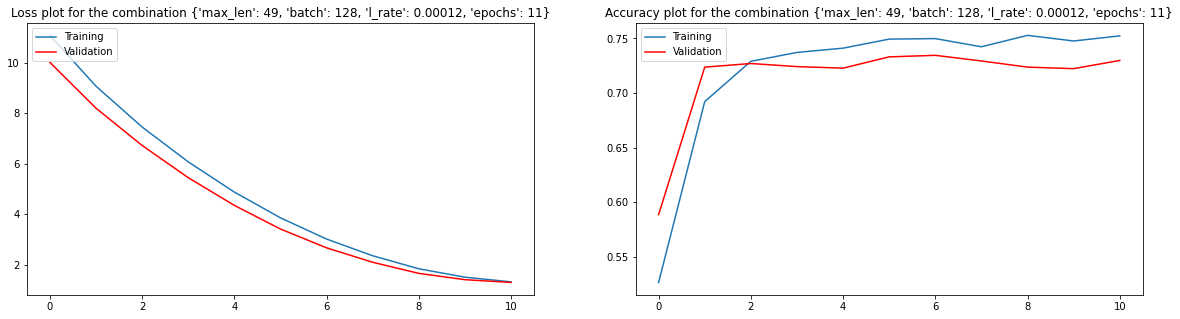

 10%|█         | 1/10 [00:34<05:13, 34.86s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_6 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


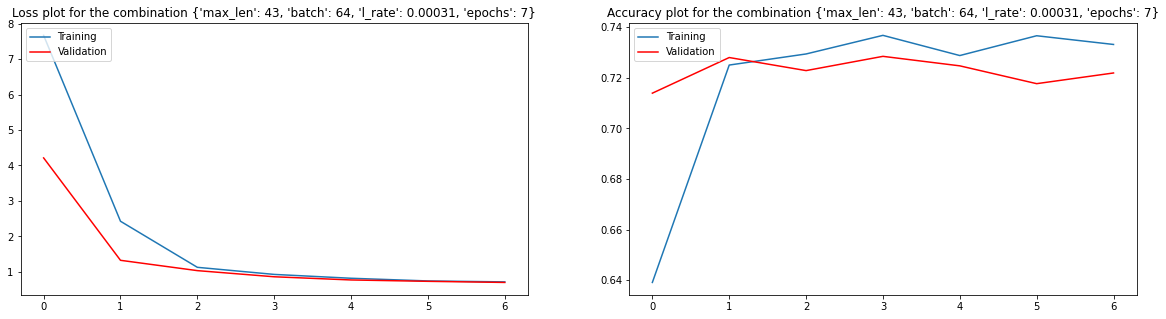

 20%|██        | 2/10 [01:12<04:45, 35.73s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_7 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


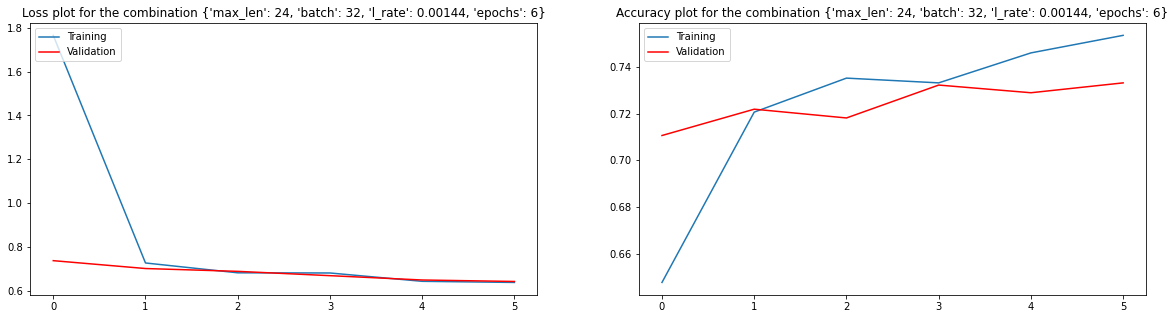

 30%|███       | 3/10 [01:50<04:15, 36.45s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_8 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


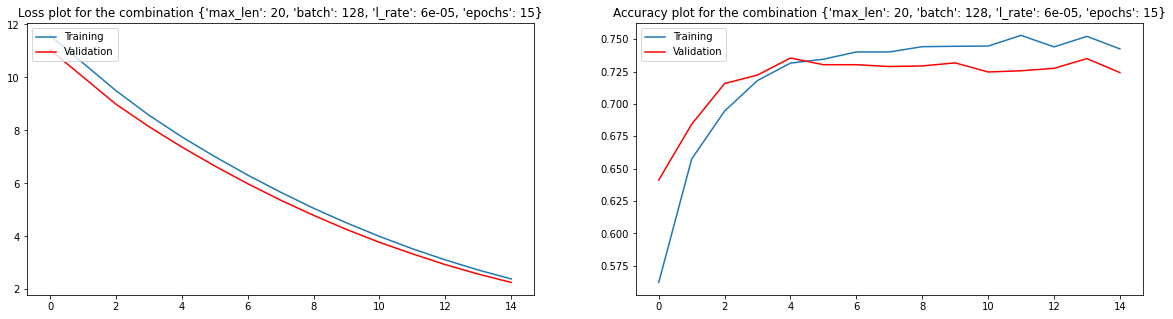

 40%|████      | 4/10 [02:18<03:23, 33.94s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_9 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


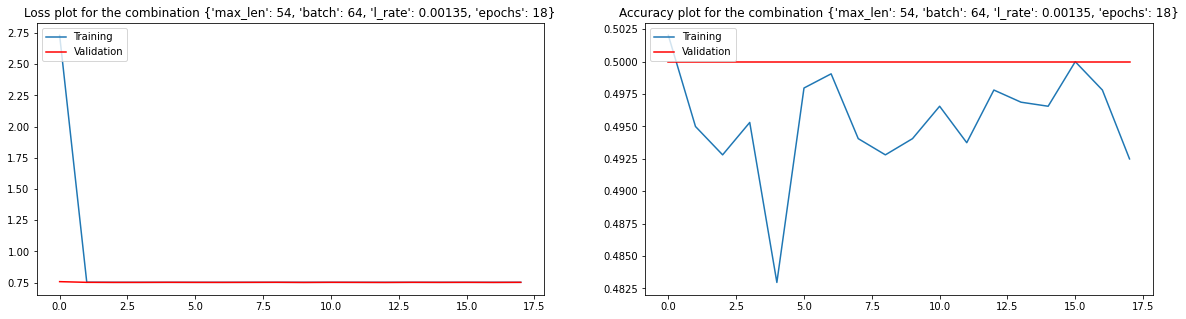

 50%|█████     | 5/10 [03:52<04:19, 51.86s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_10 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


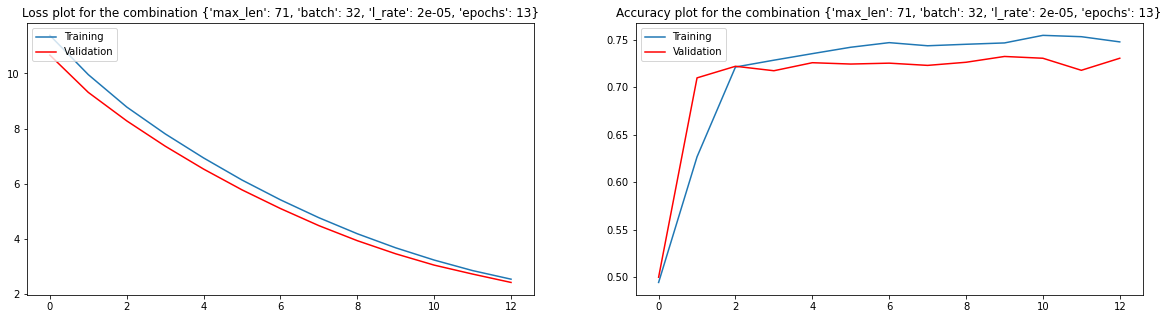

 60%|██████    | 6/10 [06:35<05:40, 85.19s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_11 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


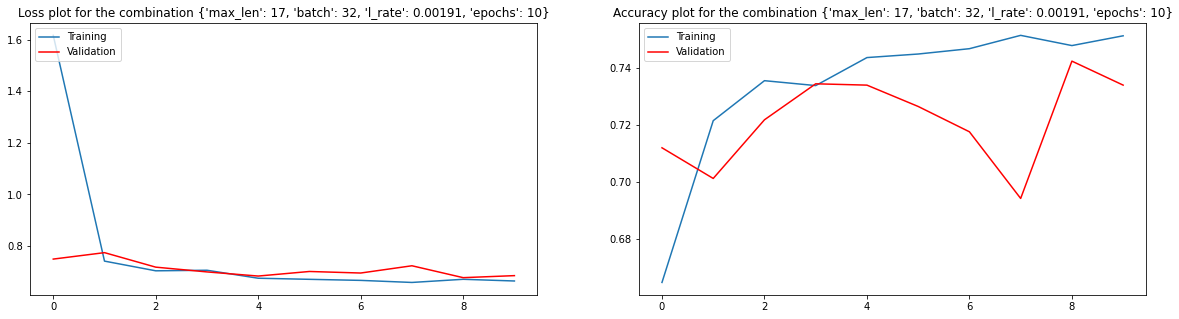

 70%|███████   | 7/10 [07:24<03:42, 74.26s/it, best loss: -0.7300000190734863]WARNING:tensorflow:Layer lstm_12 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


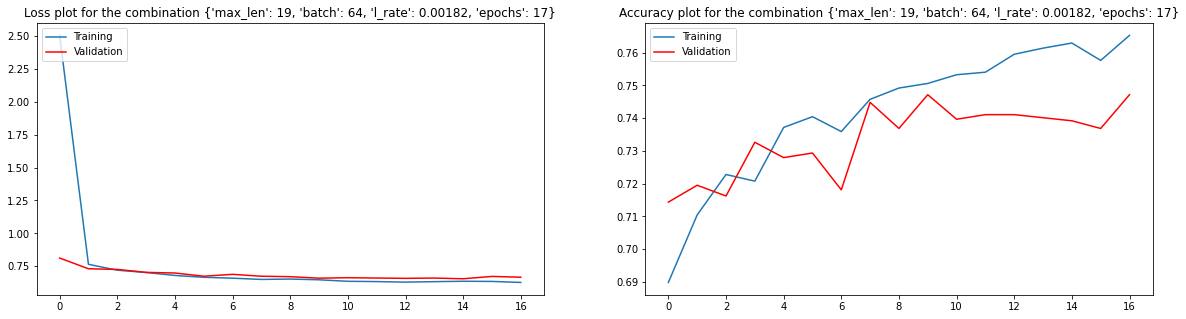

 80%|████████  | 8/10 [08:10<02:11, 65.90s/it, best loss: -0.75]              WARNING:tensorflow:Layer lstm_13 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


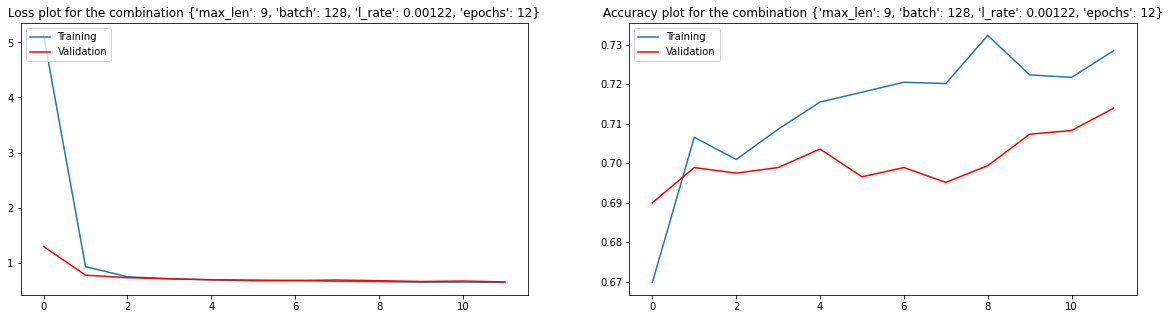

 90%|█████████ | 9/10 [08:34<00:53, 53.26s/it, best loss: -0.75]WARNING:tensorflow:Layer lstm_14 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


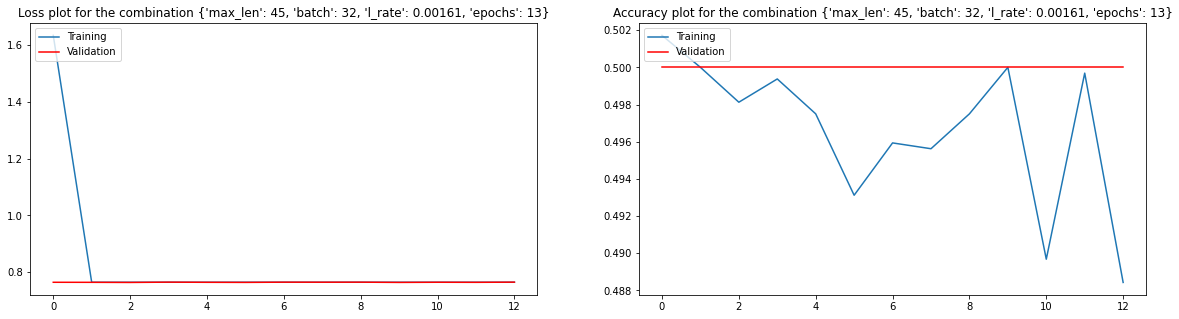

100%|██████████| 10/10 [10:27<00:00, 62.75s/it, best loss: -0.75]
{'batch_size': 1, 'epochs': 12, 'learning_rate': 0.0018206437643498807, 'max_length': 15}


In [ ]:
def objective_func(args):
    max_length = args['max_length']
    batch_size = args['batch_size']
    learning_rate = args['learning_rate']
    epochs = args['epochs']

    
    encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
    training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')

    embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings2)

    encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])
    validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding='post', truncating = 'pre') 
    
    adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
    model = model_lstm(embedding_matrix, 300, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

    history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=0, batch_size=batch_size, shuffle =True, validation_data = (validation_padded, validation['Sentiment']))
    accuracy = history.history['val_accuracy'][-1]
    u = {}
    u['max_len'] = max_length
    u['batch'] = batch_size
    u['l_rate'] = round(learning_rate,5)
    u['epochs'] = epochs

    fig, ax = plt.subplots(1,2,figsize = (20,5))

    ax[0].plot(history.history['loss'], label='Training')
    ax[0].plot(history.history['val_loss'], c='r',label='Validation')
    ax[0].legend(loc='upper left')
    ax[0].title.set_text('Loss plot for the combination ' + str(u))


    ax[1].plot(history.history['accuracy'], label='Training')
    ax[1].plot(history.history['val_accuracy'], c='r',label='Validation')
    ax[1].legend(loc='upper left')
    ax[1].title.set_text('Accuracy plot for the combination ' + str(u))  
    plt.show()

#     encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])

#     validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding=padd, truncating = trunc)
#     loss, accuracy = model.evaluate(validation_padded, validation['Sentiment'], verbose=0)
    return -round(accuracy,2)

space = {'max_length': hp.choice('max_length',range(4,75)),  
        'batch_size': hp.choice('batch_size', [32, 64, 128]),
         'epochs': hp.choice('epochs',range(5,20)), 
         'learning_rate': hp.uniform('learning_rate', 0,0.002)
        }
                                
                                
tokenise_tf = Tokenizer()
tokenise_tf.fit_on_texts(training['Doc Text'])                                
best_lstm2 = fmin(objective_func, space, algo=tpe.suggest, max_evals=10)
print(best_lstm2)

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]WARNING:tensorflow:Layer gru_5 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


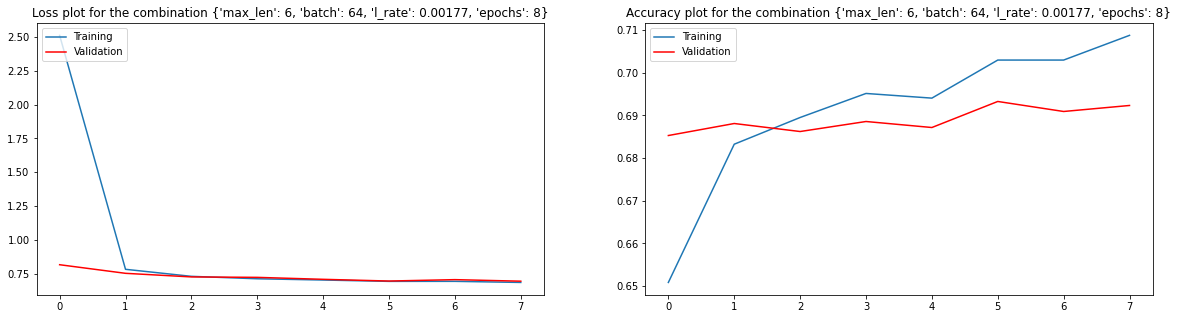

 10%|█         | 1/10 [00:25<03:52, 25.81s/it, best loss: -0.6899999976158142]WARNING:tensorflow:Layer gru_6 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


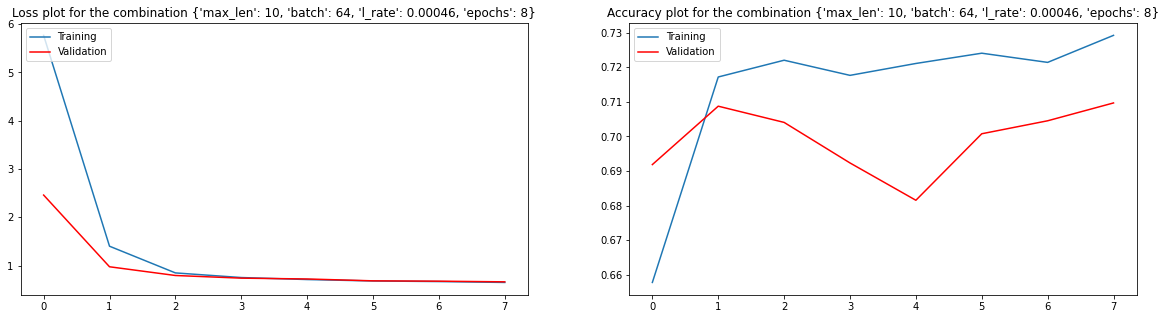

 20%|██        | 2/10 [00:54<03:33, 26.72s/it, best loss: -0.7099999785423279]WARNING:tensorflow:Layer gru_7 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


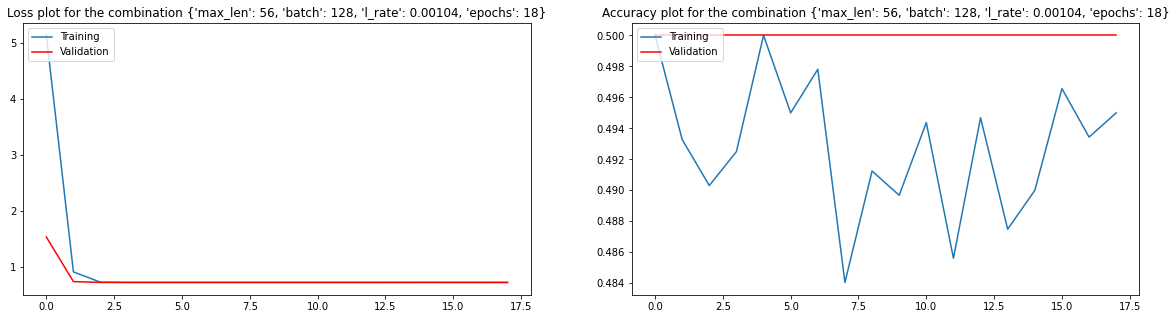

 30%|███       | 3/10 [02:04<04:36, 39.51s/it, best loss: -0.7099999785423279]WARNING:tensorflow:Layer gru_8 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


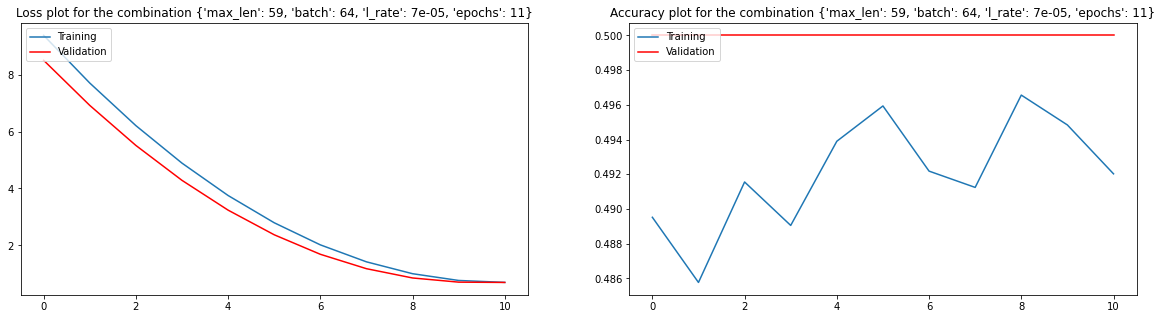

 40%|████      | 4/10 [03:26<05:15, 52.53s/it, best loss: -0.7099999785423279]WARNING:tensorflow:Layer gru_9 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


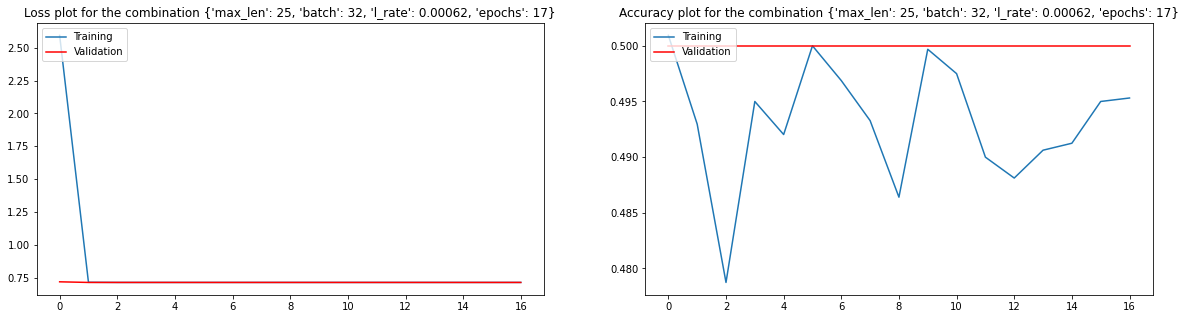

 50%|█████     | 5/10 [05:11<05:40, 68.15s/it, best loss: -0.7099999785423279]WARNING:tensorflow:Layer gru_10 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


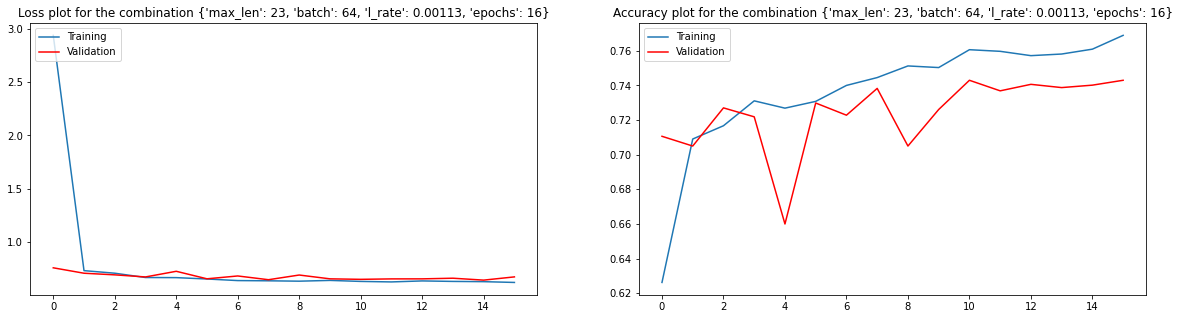

 60%|██████    | 6/10 [06:09<04:20, 65.13s/it, best loss: -0.7400000095367432]WARNING:tensorflow:Layer gru_11 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


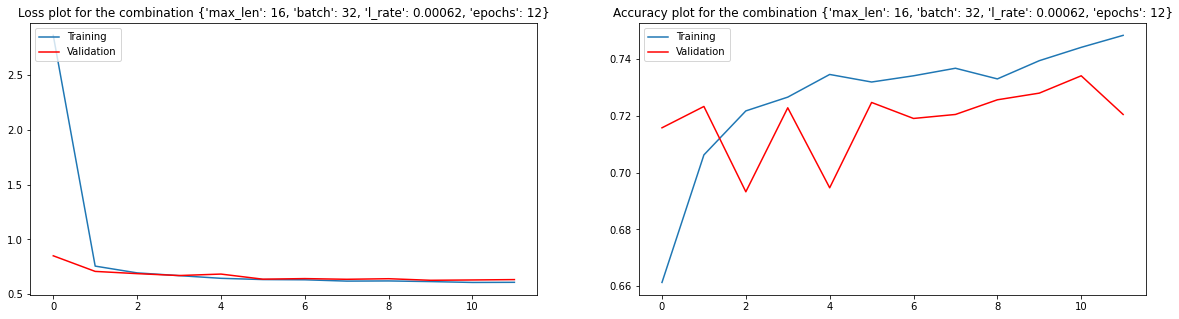

 70%|███████   | 7/10 [07:12<03:13, 64.55s/it, best loss: -0.7400000095367432]WARNING:tensorflow:Layer gru_12 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


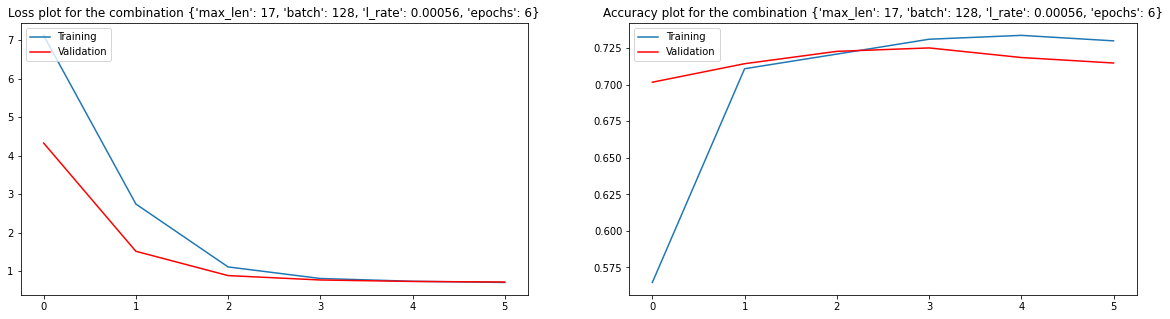

 80%|████████  | 8/10 [07:40<01:47, 53.55s/it, best loss: -0.7400000095367432]WARNING:tensorflow:Layer gru_13 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


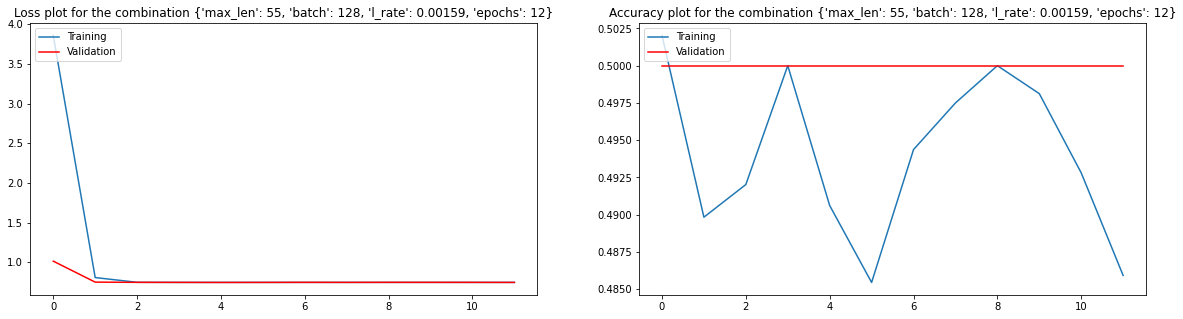

 90%|█████████ | 9/10 [08:35<00:54, 54.07s/it, best loss: -0.7400000095367432]WARNING:tensorflow:Layer gru_14 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


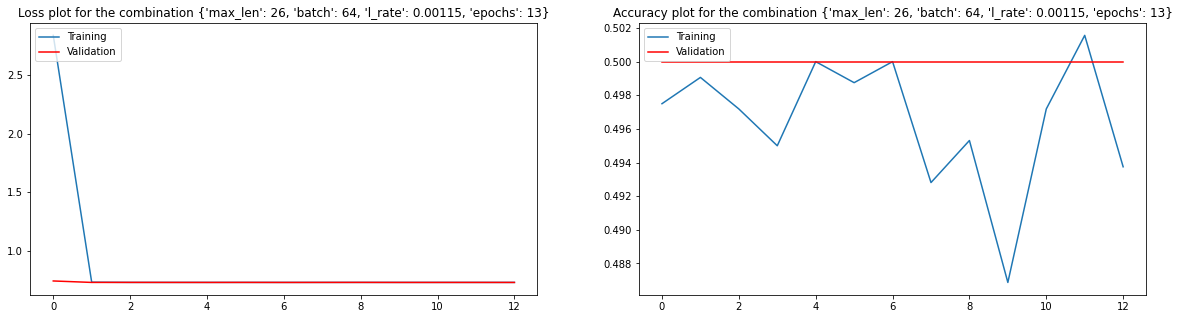

100%|██████████| 10/10 [09:33<00:00, 57.39s/it, best loss: -0.7400000095367432]
{'batch_size': 1, 'epochs': 11, 'learning_rate': 0.0011316350290725059, 'max_length': 19}


In [ ]:
def objective_func(args):
    max_length = args['max_length']
    batch_size = args['batch_size']
    learning_rate = args['learning_rate']
    epochs = args['epochs']

    
    encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
    training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')

    embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings2)

    encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])
    validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding='post', truncating = 'pre') 
    
    adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
    model = model_gru(embedding_matrix, 300, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

    history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=0, batch_size=batch_size, shuffle =True, validation_data = (validation_padded, validation['Sentiment']))
    accuracy = history.history['val_accuracy'][-1]
    u = {}
    u['max_len'] = max_length
    u['batch'] = batch_size
    u['l_rate'] = round(learning_rate,5)
    u['epochs'] = epochs

    fig, ax = plt.subplots(1,2,figsize = (20,5))

    ax[0].plot(history.history['loss'], label='Training')
    ax[0].plot(history.history['val_loss'], c='r',label='Validation')
    ax[0].legend(loc='upper left')
    ax[0].title.set_text('Loss plot for the combination ' + str(u))


    ax[1].plot(history.history['accuracy'], label='Training')
    ax[1].plot(history.history['val_accuracy'], c='r',label='Validation')
    ax[1].legend(loc='upper left')
    ax[1].title.set_text('Accuracy plot for the combination ' + str(u))  
    plt.show()

#     encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])

#     validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding=padd, truncating = trunc)
#     loss, accuracy = model.evaluate(validation_padded, validation['Sentiment'], verbose=0)
    return -round(accuracy,2)

space = {'max_length': hp.choice('max_length',range(4,75)),  
        'batch_size': hp.choice('batch_size', [32, 64, 128]),
         'epochs': hp.choice('epochs',range(5,20)), 
         'learning_rate': hp.uniform('learning_rate', 0,0.002)
        }
                                
                                
tokenise_tf = Tokenizer()
tokenise_tf.fit_on_texts(training['Doc Text'])                                
best_gru2 = fmin(objective_func, space, algo=tpe.suggest, max_evals=10)
print(best_gru2)

# For all the three RNNs,I got best accuracy when they were trained on the pre-trained and fine-tuned word embeddings.



In [ ]:
batch_size_temp = [32,64,128]

# I got best validation accuracy of 73 with Vanilla RNN model trained on the pre trained and fine tuned word embeddings with hyperparameters: 

## 'batch_size': 128, 'epochs': 11, 'learning_rate': 0.0016, 'max_length': 8

In [ ]:
# best_vanilla_rnn2['batch_size'] = batch_size_temp[best_vanilla_rnn2['batch_size']]
# best_v_r_df = pd.DataFrame(data = best_vanilla_rnn2.items(),index=best_vanilla_rnn2.keys())
# best_v_r_df.to_csv('best_v_r.csv')

# I got best validation accuracy of 75 with LSTM model trained on the pre trained and fine tuned word embeddings with hyperparameters: 

## 'batch_size': 64, 'epochs': 12, 'learning_rate': 0.0018206437643498807, 'max_length': 15

In [ ]:
# best_l_r['batch_size'] = batch_size_temp[best_l_r['batch_size']]
# best_l_r_df = pd.DataFrame(best_l_r.items(),index=best_l_r.keys())
# best_l_r_df.to_csv('best_l_r.csv')

# I got best validation accuracy of 74 with GRU model trained on the pre trained and fine tuned word embeddings with hyperparameters: 

## 'batch_size': 64, 'epochs': 11, 'learning_rate': 0.001, 'max_length': 19

In [ ]:
# best_g_r = {'batch_size': 64, 'epochs': 11, 'learning_rate': 0.001, 'max_length': 19}
# best_g_r_df = pd.DataFrame(best_g_r.items(),index=best_g_r.keys())
# best_g_r_df.to_csv('best_g_r.csv')

## Out of the three above, LSTM performed best on the validation data

# ###

# Evaluating on the test data

In [ ]:
test = pd.read_csv('Test Data1.csv').iloc[:,1:]

test.head()

Doc Text  Sentiment
0           either willing go claustrophobic concept          1
1  offer enough playful fun entertain preschool s...          1
2                        boisterous daft documentary          1
3          arteta direct one best ensemble cast year          1
4  wonderful combination sweetness extraordinary ...          1

In [ ]:
def test_evaluation(test, model, max_length, batch_size, epochs, learning_rate):
  tokenise_tf = Tokenizer()
  tokenise_tf.fit_on_texts(training['Doc Text']) 
  
  encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
  training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')

  embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings2)

  encoded_test = tokenise_tf.texts_to_sequences(test['Doc Text'])
  test_padded = pad_sequences(encoded_test, maxlen=max_length, padding='post', truncating = 'pre') 
  
  adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
  model2 = model(embedding_matrix, 300, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

  history = model2.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=0, batch_size=batch_size, shuffle =True)
  temp = lambda x: 1 if x>= 0.5 else 0 
  y_pred = [temp(i) for i in model2.predict(test_padded)]
  # print(y_pred) 
  y_test = test['Sentiment']
  # print(y_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  return accuracy, precision, recall, f1

In [ ]:
# Testing Vanilla RNN

In [ ]:
best_v_r_df2 = pd.read_csv('best_v_r.csv')
Vanilla_acc, Vanilla_prec, Vanilla_rec, Vanilla_f1= test_evaluation(test, model_vanilla_rnn, best_v_r_df2['max_length'][0], best_v_r_df2['batch_size'][0], best_v_r_df2['epochs'][0], best_v_r_df2['learning_rate'][0])
print('Accuracy of Vanilla RNN on the test data: ' + str(Vanilla_acc))
print('Accuracy of Vanilla RNN on the test data: ' + str(Vanilla_prec))
print('Accuracy of Vanilla RNN on the test data: ' + str(Vanilla_rec))
print('Accuracy of Vanilla RNN on the test data: ' + str(Vanilla_f1))

Accuracy of Vanilla RNN on the test data: 0.7160262417994376
Accuracy of Vanilla RNN on the test data: 0.7045252883762201
Accuracy of Vanilla RNN on the test data: 0.7441424554826617
Accuracy of Vanilla RNN on the test data: 0.7237921604375569


In [ ]:
# Testing LSTM 

In [ ]:
best_lstm_df2 = pd.read_csv('best_l_r.csv')
lstm_acc, lstm_prec, lstm_rec, lstm_f1= test_evaluation(test, model_lstm, best_lstm_df2['max_length'][0], best_lstm_df2['batch_size'][0], best_lstm_df2['epochs'][0], best_lstm_df2['learning_rate'][0])
print('Accuracy of LSTM RNN on the test data: ' + str(lstm_acc))
print('Accuracy of LSTM RNN on the test data: ' + str(lstm_prec))
print('Accuracy of LSTM RNN on the test data: ' + str(lstm_rec))
print('Accuracy of LSTM RNN on the test data: ' + str(lstm_f1))

Accuracy of LSTM RNN on the test data: 0.7403936269915652
Accuracy of LSTM RNN on the test data: 0.7720042417815483
Accuracy of LSTM RNN on the test data: 0.6822867853795689
Accuracy of LSTM RNN on the test data: 0.7243781094527363


In [ ]:
# Testing GRU

In [ ]:
best_gru_df2 = pd.read_csv('best_g_r.csv')
gru_acc, gru_prec,gru_rec,gru_f1= test_evaluation(test, model_gru, best_gru_df2['max_length'][0], best_gru_df2['batch_size'][0], best_gru_df2['epochs'][0], best_gru_df2['learning_rate'][0])
print('Accuracy of GRU RNN on the test data: ' + str(gru_acc))
print('Accuracy of GRU RNN on the test data: ' + str(gru_prec))
print('Accuracy of GRU RNN on the test data: ' + str(gru_rec))
print('Accuracy of GRU RNN on the test data: ' + str(gru_f1))

Accuracy of GRU RNN on the test data: 0.7539831302717901
Accuracy of GRU RNN on the test data: 0.7495395948434622
Accuracy of GRU RNN on the test data: 0.7628865979381443
Accuracy of GRU RNN on the test data: 0.7561542034370645


## I got best test accuracy of 75 percent with the GRU RNN 

# Observed differences between the performances of the three rnns:
## Got best validation accuracy with LSTM but got best test accuracy with GRU
## Vanilla RNN is fastest and LSTM is slowest in terms of training because LSTM has more parameters and heavier computation
## Vanilla RNN gave comparitively lowest accuracies after hyper parameter tuning maybe because of vanishing gradient problem.


# ##########

# Ignore the code from now on. I just wanted to save the code for element-wise max.
# With the element_wise max of all the hidden states as the output, I got less accuracy of 50. Whatever the parameters, the accuracy didn't cross 0.5

## Taking elementwise max of the hidden states

In [ ]:
def model_vanilla_rnn_em(embedding_matrix, noh, vocab_size, max_length, adam_optimizer, activation, Dropout_rate, kernel_regularizer_coef, activity_regularizer_coef):

    model = Sequential()
    e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable = False)
    model.add(e)
    model.add(SimpleRNN(units = noh, activation = activation, dropout=0.2, return_sequences=True, kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef)))
    model.add(MaxPool1D(max_length, strides = None))
    # model.add(Dropout(Dropout_rate))

#     model.add(Dense(1, activation='softmax'))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef)))
    model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     print(model.summary())
    
#     print(z)
    return model


In [ ]:
def model_lstm_em(embedding_matrix, noh, vocab_size, max_length, adam_optimizer, activation, Dropout_rate, kernel_regularizer_coef, activity_regularizer_coef):

    model = Sequential()
    e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable = False)
    model.add(e)
    model.add(LSTM(units = noh, activation = activation, dropout=0.2, return_sequences=True, kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef)))
    model.add(MaxPool1D(max_length, strides = None))
    # model.add(Dropout(Dropout_rate))

#     model.add(Dense(1, activation='softmax'))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef)))
    model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     print(model.summary())
    
#     print(z)
    return model


In [ ]:
def model_gru_em(embedding_matrix, noh, vocab_size, max_length, adam_optimizer, activation, Dropout_rate, kernel_regularizer_coef, activity_regularizer_coef):

    model = Sequential()
    e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable = False)
    model.add(e)
    model.add(GRU(units = noh, activation = activation, dropout=0.2, return_sequences=True, kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef)))
    model.add(MaxPool1D(max_length, strides = None))
#     model.add(Dropout(Dropout_rate))

#     model.add(Dense(1, activation='softmax'))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef)))
    model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     print(model.summary())
    
#     print(z)
    return model


## Changing the no of hidden units
## Keeping max_length = 40
## epochs = 15
## batch_size = 64
## learning_rate = 0.001


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


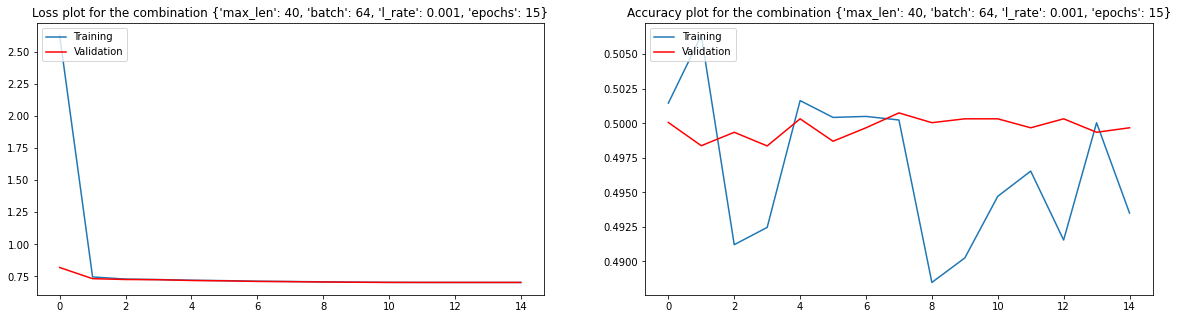

Accuracy for 300 hidden units 40 sequence length: 0.49967545


In [ ]:
par_selec(model_vanilla_rnn_em, 40, 300)

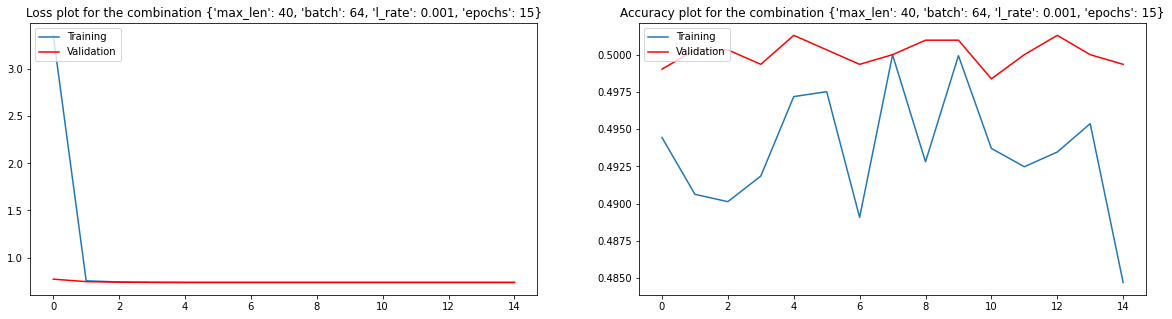

Accuracy for 300 hidden units 40 sequence length: 0.49935088


In [ ]:
par_selec(model_lstm_em, 40, 300)

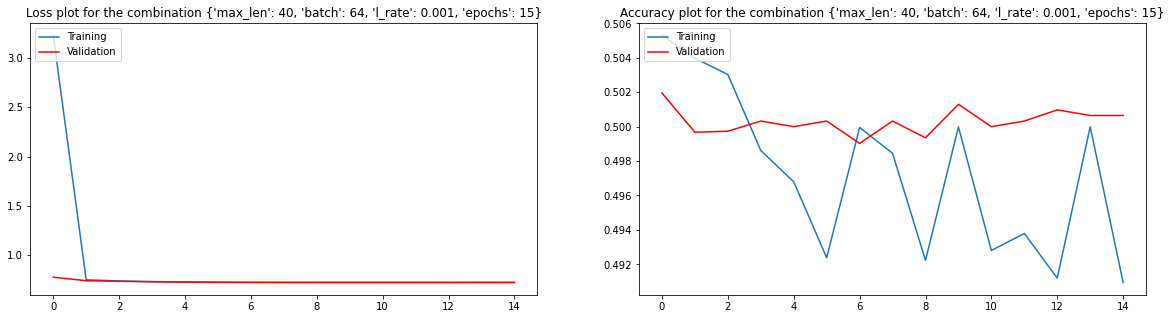

Accuracy for 300 hidden units 40 sequence length: 0.5006491


In [ ]:
par_selec(model_gru_em, 40, 300)

## Doubling the no of hidden units

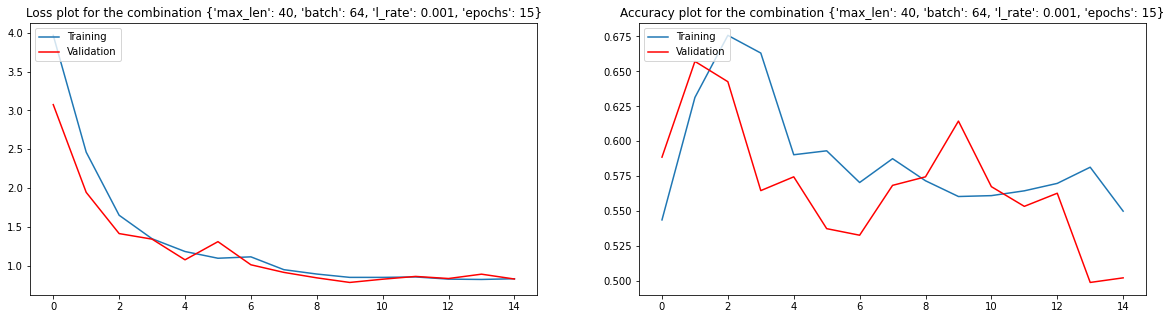

Accuracy for 300 hidden units 40 sequence length: 0.5023452


In [ ]:
par_selec(model_vanilla_rnn_em, 40, 300)

### For Vanilla RNN,  With double the no of hidden units, the accuracy reduced from 74 to 73 percent.

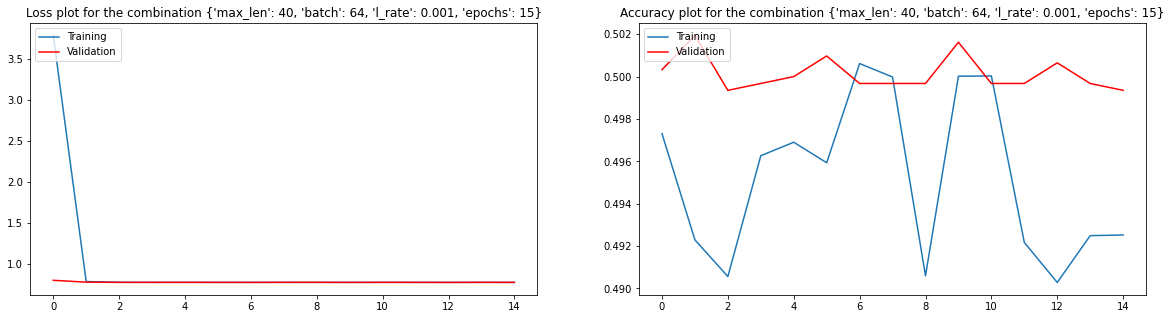

Accuracy for 600 hidden units 40 sequence length: 0.49935088


In [ ]:
par_selec(model_lstm_em, 40, 600)

### For LSTM, With double the no of hidden units, the accuracy reduced from 74 to 73 percent.

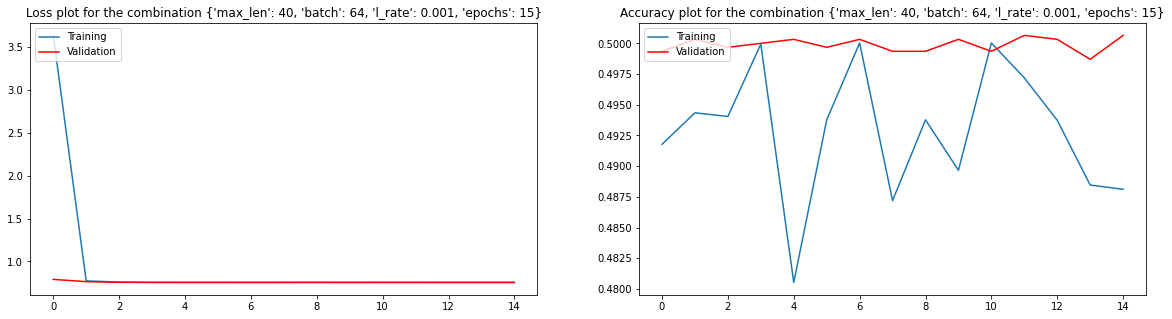

Accuracy for 600 hidden units 40 sequence length: 0.5006491


In [ ]:
par_selec(model_gru_em, 40, 600)

### For GRU, With double the no of hidden units, the accuracy reduced from 74 to 73 percent.

# Halving the no of hidden units

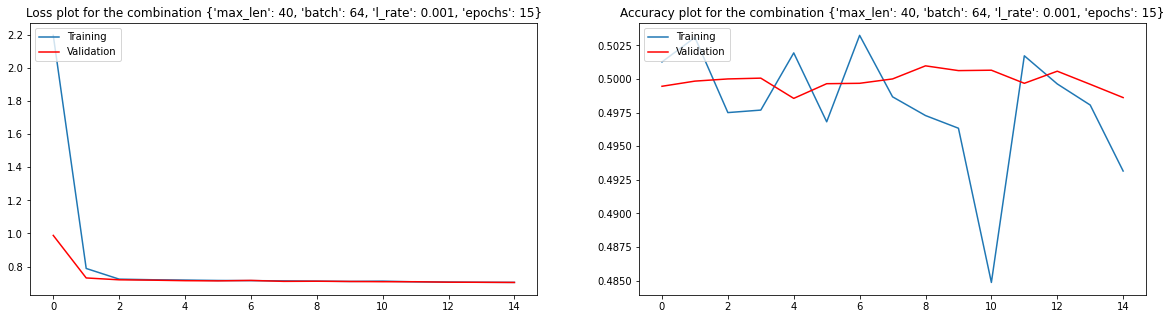

Accuracy for 150 hidden units 40 sequence length: 0.49861324


In [ ]:
par_selec(model_vanilla_rnn_em, 40, 150)

### With halve the no of hidden units, the accuracy increased slightly from 73.8 to 74.4.

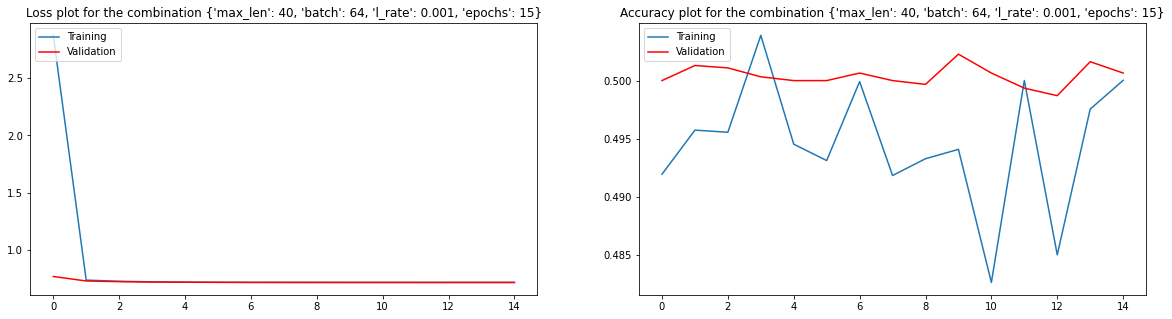

Accuracy for 150 hidden units 40 sequence length: 0.5006491


In [ ]:
par_selec(model_lstm_em, 40, 150)

### For LSTM, With halve the no of hidden units, the accuracy reduced from 74 to 73 percent.

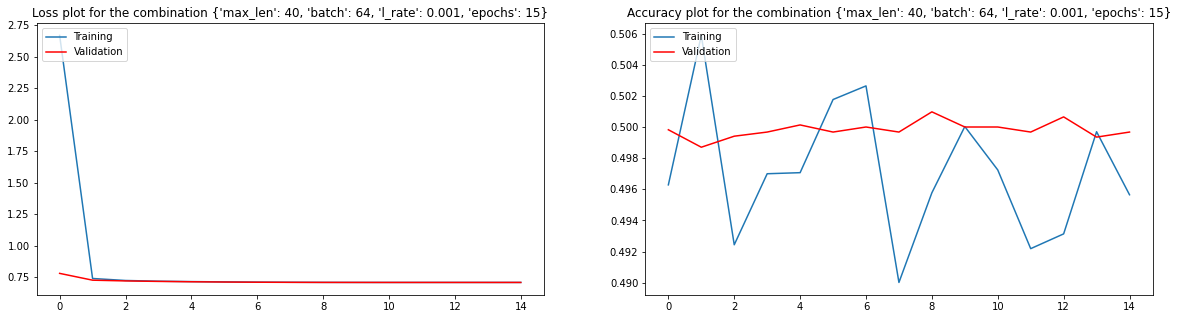

Accuracy for 150 hidden units 40 sequence length: 0.49967545


In [ ]:
par_selec(model_gru_em, 40, 150)

### For GRU, With halve the no of hidden units, the accuracy reduced from 74 to 73 percent.

# Changing the max_length 
# Keeping no of hidden units = 300
# epochs = 15
# batch_size = 64
# learning_rate = 0.001


## Doubling the sequence length from 40 to 80

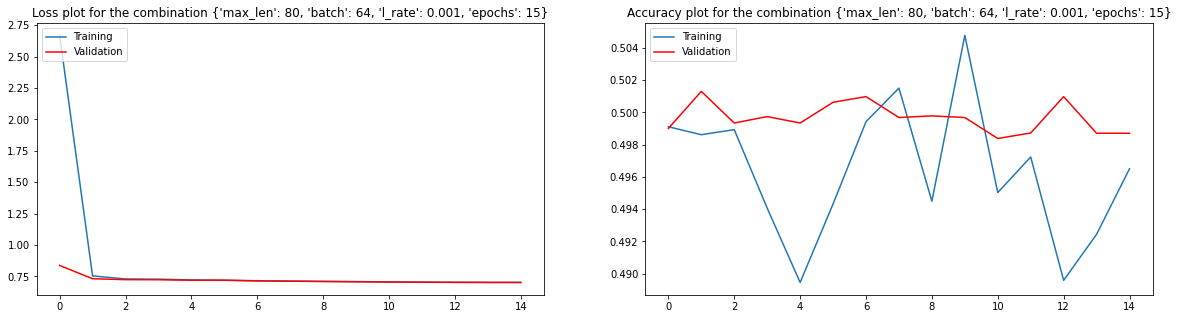

Accuracy for 300 hidden units 80 sequence length: 0.49870175


In [ ]:
par_selec(model_vanilla_rnn_em, 80, 300)

### For vanilla rnn, With double the sequence length, there was an insignificant increase in accuracy from 73.83 to 73.87



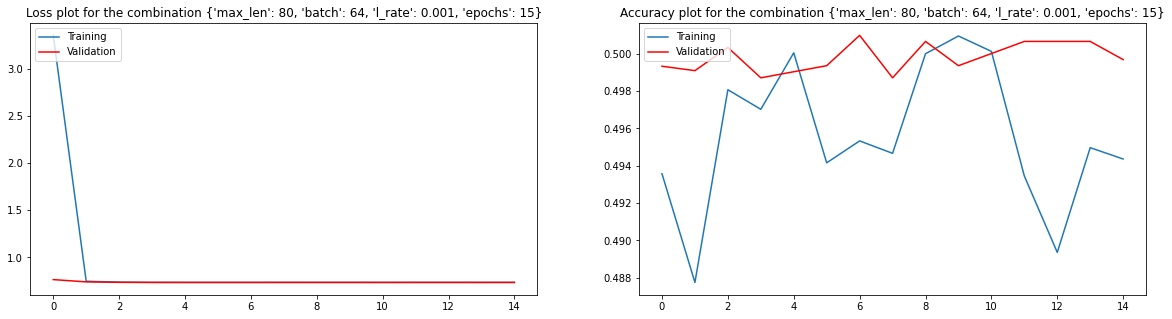

Accuracy for 300 hidden units 80 sequence length: 0.49967545


In [ ]:
par_selec(model_lstm_em, 80, 300)

### For LSTM, With double the sequence length, there was an insignificant increase in accuracy from 73.83 to 73.87



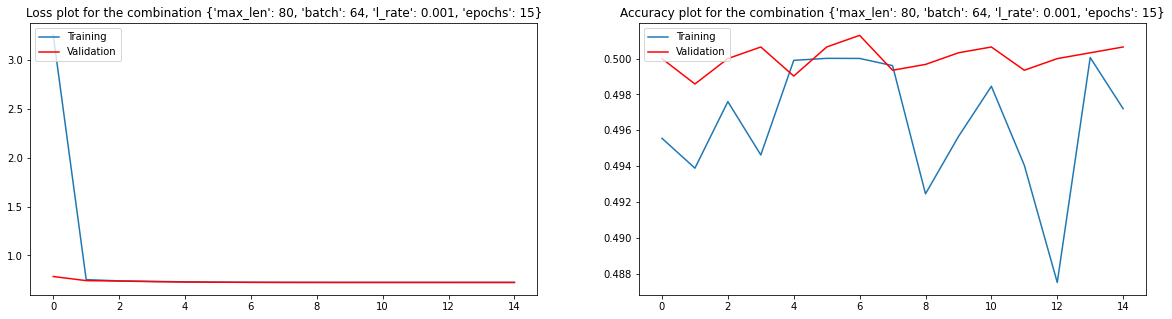

Accuracy for 300 hidden units 80 sequence length: 0.5006491


In [ ]:
par_selec(model_gru_em, 80, 300)

### For GRU, With double the sequence length, there was an insignificant increase in accuracy from 73.83 to 73.87



### When we increase the sequence length we might include important words that would change the sentiment of the sentence

## Halving the sequence length from 40 to 20

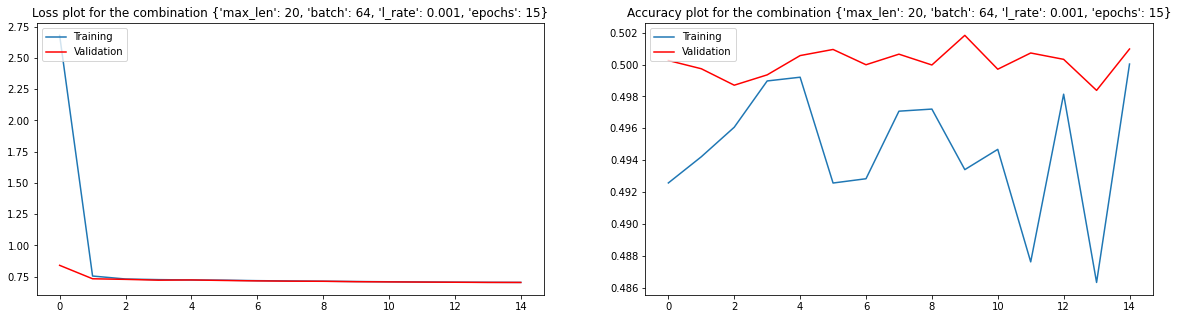

Accuracy for 300 hidden units 20 sequence length: 0.5009737


In [ ]:
par_selec(model_vanilla_rnn_em, 20, 300)

In [ ]:
# max_length = 20
# epochs = 15
# batch_size = 64
# learning_rate = 0.001

# encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
# training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')
# embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings)

# encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])
# validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding='post', truncating = 'pre')

# adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
# model = model_vanilla_rnn(embedding_matrix, 300, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

# history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=2, batch_size=batch_size, shuffle =True, validation_data = (validation_padded, validation['Sentiment']))
# accuracy = history.history['val_accuracy'][-1]



### For vanilla RNN, With half the sequence length, there was a slight decrease in accuracy from 73.8 to 73.2


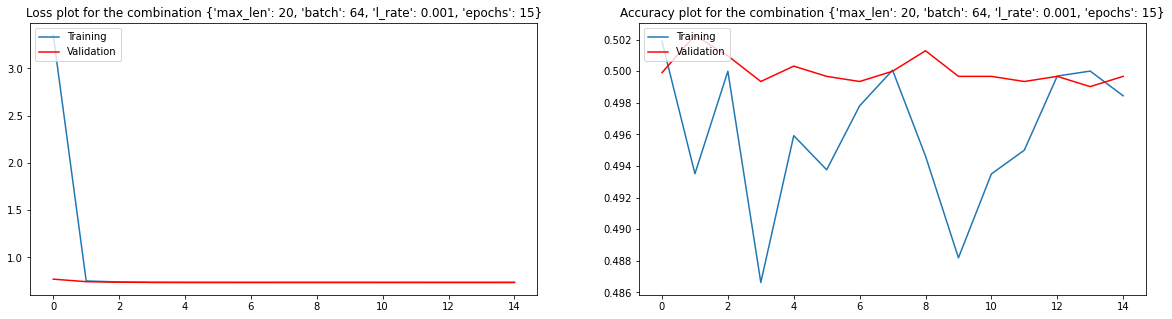

Accuracy for 300 hidden units 20 sequence length: 0.49967545


In [ ]:
par_selec(model_lstm_em, 20, 300)

### For LSTM, With half the sequence length, there was a slight decrease in accuracy from 73.8 to 73.2


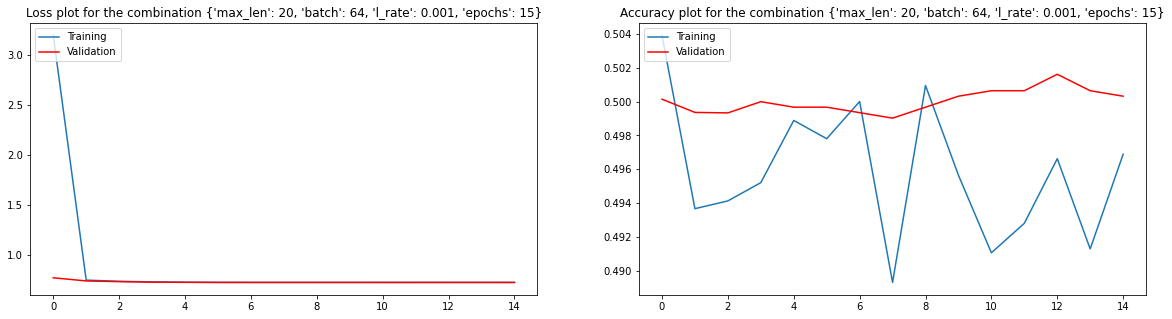

Accuracy for 300 hidden units 20 sequence length: 0.50032455


In [ ]:
par_selec(model_gru_em, 20, 300)

### For GRU, With half the sequence length, there was a slight decrease in accuracy from 73.8 to 73.2



### It makes sense as when we decrease the sequence length we might lose important words that change the sentiment of the sentence

###

## Fine tuning the word embeddings using mittens library

In [ ]:
def finetune(training): 
  training_tokens = [word_tokenize(i) for i in training['Doc Text']]
  #training_tokens

  oov = [j for i in training_tokens for j in i if j not in embeddings.keys()]
  print(len(oov))

  corp_vocab = list(set(oov))

  cv = CountVectorizer(ngram_range=(1,1), vocabulary=corp_vocab)
  trr =''
  for i in training_tokens:
    for j in i:
      trr+= j
      trr += ' '

  # print(trr)
  # print(z)
  X = cv.fit_transform([trr])
  Xc = (X.T * X)
  Xc.setdiag(0)
  coocc_ar = Xc.toarray()

  mittens_model = Mittens(n=300, max_iter=1000)

  new_embeddings = mittens_model.fit(
      coocc_ar,
      vocab=corp_vocab,
      initial_embedding_dict= embeddings)

  new_embeddings = dict(zip(corp_vocab, new_embeddings))
  return training_tokens, new_embeddings
  


In [ ]:
embeddings2= embeddings.copy()

training_tokens, new_embeddings = finetune(training)
embeddings2.update(new_embeddings)

558


/usr/local/lib/python3.6/dist-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
Iteration 1000: loss: 0.027514204382896423

In [ ]:
oov2 = [j for i in training_tokens for j in i if j not in embeddings2.keys()]
print(len(oov2))

0


### Using new embeddings for the vanilla rnn em

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

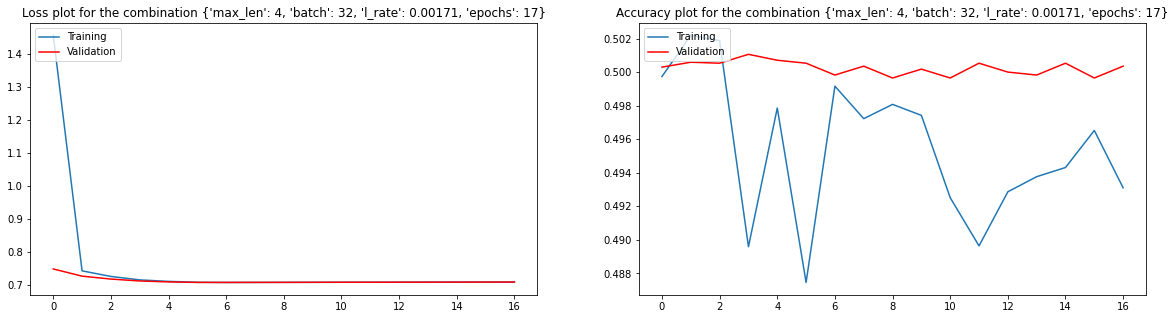

 10%|█         | 1/10 [00:49<07:27, 49.76s/it, best loss: -0.5]

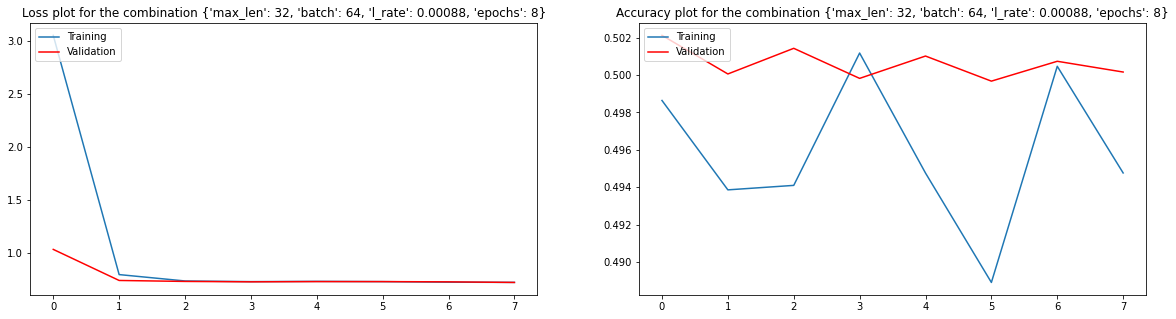

 20%|██        | 2/10 [03:03<12:12, 91.52s/it, best loss: -0.5]


KeyboardInterrupt: ignored

In [ ]:
def objective_func(args):
    max_length = args['max_length']
    batch_size = args['batch_size']
    learning_rate = args['learning_rate']
    epochs = args['epochs']

    
    encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
    training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')

    embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings2)

    encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])
    validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding='post', truncating = 'pre') 
    
    adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
    model = model_vanilla_rnn_em(embedding_matrix, 300, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

    history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=0, batch_size=batch_size, shuffle =True, validation_data = (validation_padded, validation['Sentiment']))
    accuracy = history.history['val_accuracy'][-1]
    u = {}
    u['max_len'] = max_length
    u['batch'] = batch_size
    u['l_rate'] = round(learning_rate,5)
    u['epochs'] = epochs

    fig, ax = plt.subplots(1,2,figsize = (20,5))

    ax[0].plot(history.history['loss'], label='Training')
    ax[0].plot(history.history['val_loss'], c='r',label='Validation')
    ax[0].legend(loc='upper left')
    ax[0].title.set_text('Loss plot for the combination ' + str(u))


    ax[1].plot(history.history['accuracy'], label='Training')
    ax[1].plot(history.history['val_accuracy'], c='r',label='Validation')
    ax[1].legend(loc='upper left')
    ax[1].title.set_text('Accuracy plot for the combination ' + str(u))  
    plt.show()

#     encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])

#     validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding=padd, truncating = trunc)
#     loss, accuracy = model.evaluate(validation_padded, validation['Sentiment'], verbose=0)
    return -round(accuracy,2)

space = {'max_length': hp.choice('max_length',range(4,75)),  
        'batch_size': hp.choice('batch_size', [32, 64, 128]),
         'epochs': hp.choice('epochs',range(5,20)), 
         'learning_rate': hp.uniform('learning_rate', 0,0.002)
        }
                                
                                
tokenise_tf = Tokenizer()
tokenise_tf.fit_on_texts(training['Doc Text'])                                
best_vanilla_rnn_em2 = fmin(objective_func, space, algo=tpe.suggest, max_evals=10)
print(best_vanilla_rnn_em2)

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

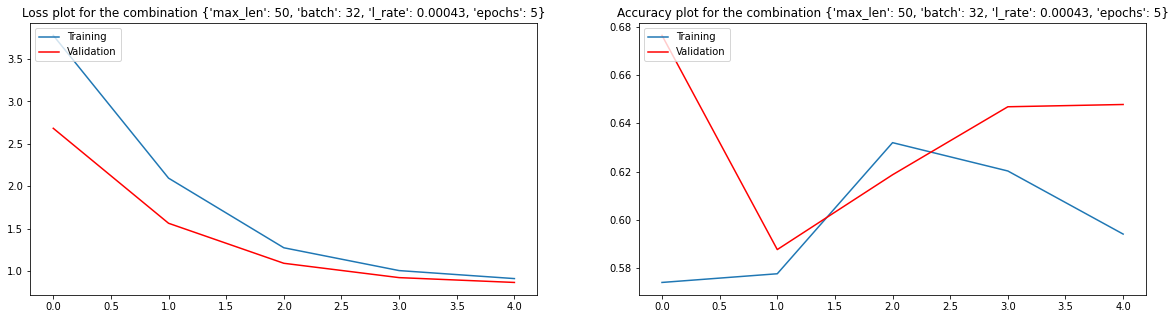

 10%|█         | 1/10 [02:08<19:16, 128.51s/it, best loss: -0.6499999761581421]

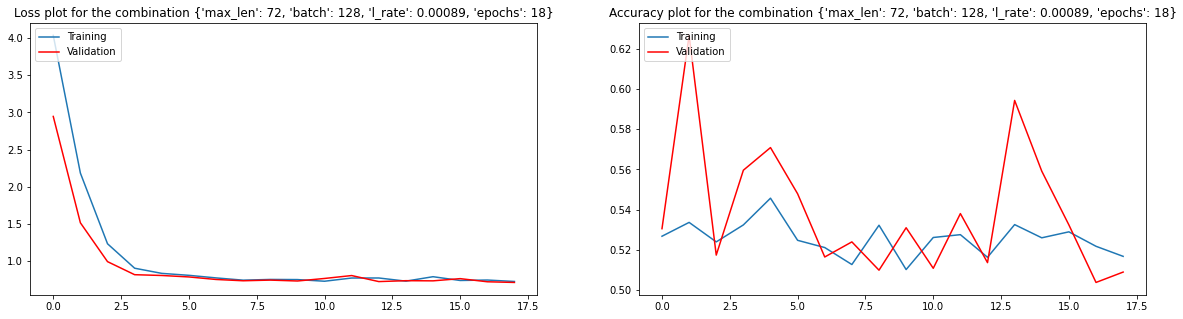

 20%|██        | 2/10 [04:52<18:32, 139.07s/it, best loss: -0.6499999761581421]

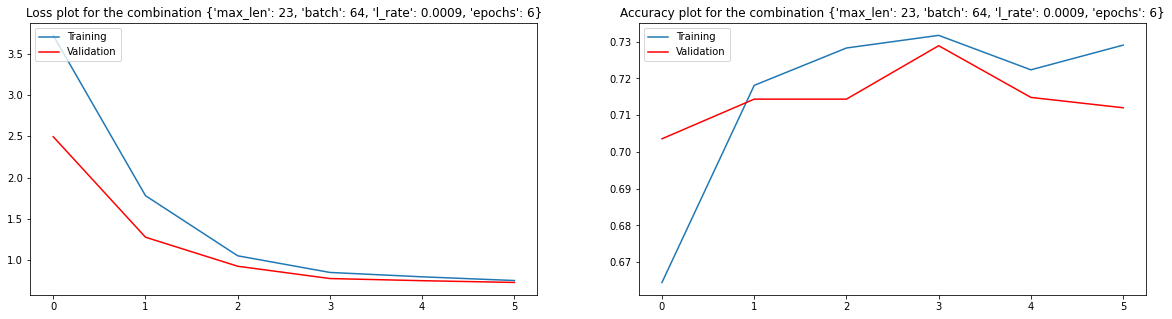

 30%|███       | 3/10 [06:19<14:44, 126.35s/it, best loss: -0.7099999785423279]


KeyboardInterrupt: ignored

In [ ]:
def objective_func(args):
    max_length = args['max_length']
    batch_size = args['batch_size']
    learning_rate = args['learning_rate']
    epochs = args['epochs']

    
    encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
    training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')
    embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings2)

    encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])
    validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding='post', truncating = 'pre')
    
    adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
    model = model_vanilla_rnn(embedding_matrix, 300, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

    history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=0, batch_size=batch_size, shuffle =True, validation_data = (validation_padded, validation['Sentiment']))
    accuracy = history.history['val_accuracy'][-1]
    u = {}
    u['max_len'] = max_length
    u['batch'] = batch_size
    u['l_rate'] = round(learning_rate,5)
    u['epochs'] = epochs

    fig, ax = plt.subplots(1,2,figsize = (20,5))

    ax[0].plot(history.history['loss'], label='Training')
    ax[0].plot(history.history['val_loss'], c='r',label='Validation')
    ax[0].legend(loc='upper left')
    ax[0].title.set_text('Loss plot for the combination ' + str(u))


    ax[1].plot(history.history['accuracy'], label='Training')
    ax[1].plot(history.history['val_accuracy'], c='r',label='Validation')
    ax[1].legend(loc='upper left')
    ax[1].title.set_text('Accuracy plot for the combination ' + str(u))  
    plt.show()

#     encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])

#     validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding=padd, truncating = trunc)
#     loss, accuracy = model.evaluate(validation_padded, validation['Sentiment'], verbose=0)
    return -round((accuracy),2)

space = {'max_length': hp.choice('max_length',range(4,75)),  
        'batch_size': hp.choice('batch_size', [32, 64, 128]),
         'epochs': hp.choice('epochs',range(5,20)), 
         'learning_rate': hp.uniform('learning_rate', 0,0.002)
        }
                                
                                
tokenise_tf = Tokenizer()
tokenise_tf.fit_on_texts(training['Doc Text'])                                
best_vanilla_rnn_em = fmin(objective_func, space, algo=tpe.suggest, max_evals=10)
print(best_vanilla_rnn_em)

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

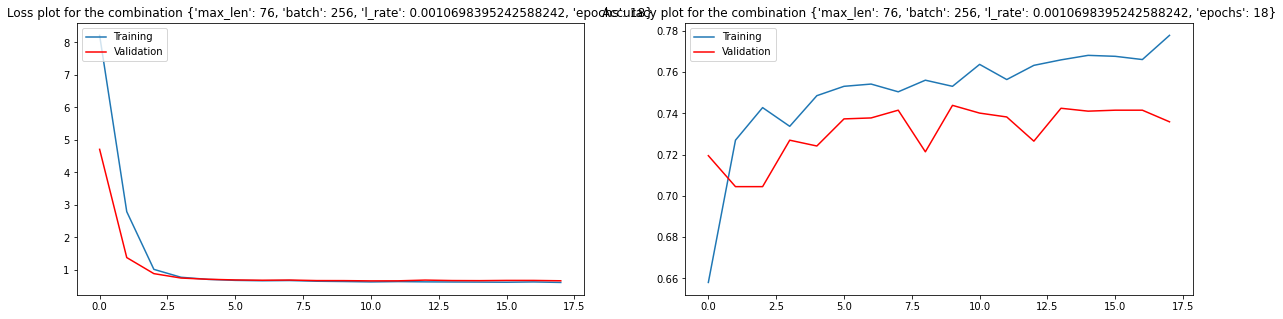

 10%|█         | 1/10 [00:19<02:54, 19.39s/it, best loss: -0.74]

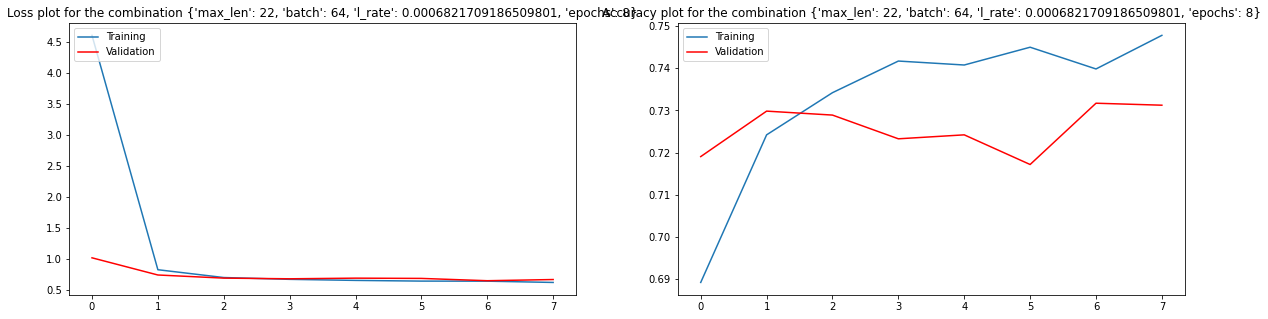

 20%|██        | 2/10 [00:28<02:09, 16.18s/it, best loss: -0.74]

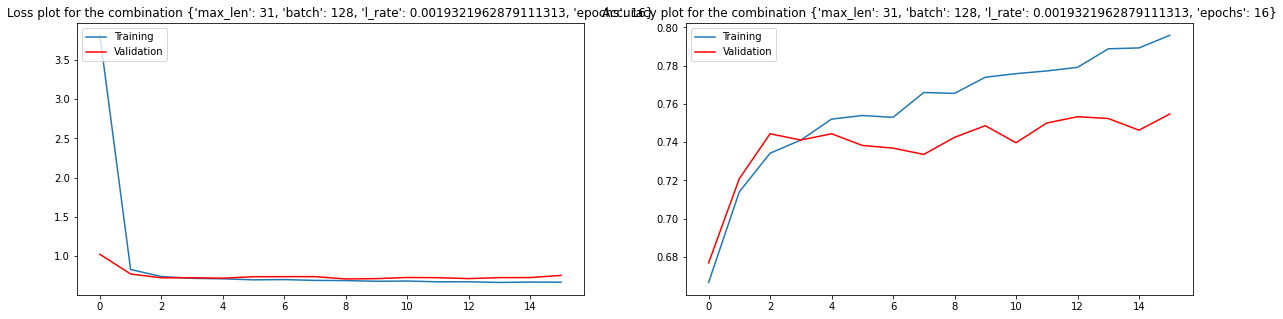

 30%|███       | 3/10 [00:40<01:44, 14.90s/it, best loss: -0.75]

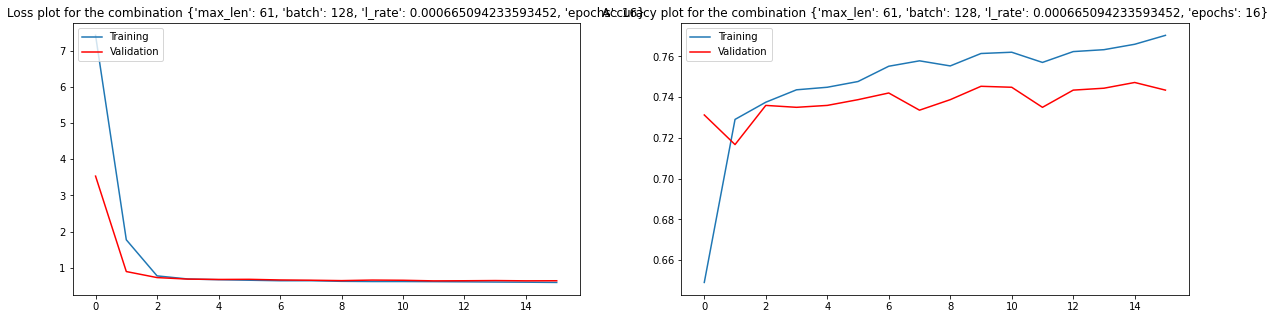

 40%|████      | 4/10 [00:57<01:34, 15.78s/it, best loss: -0.75]

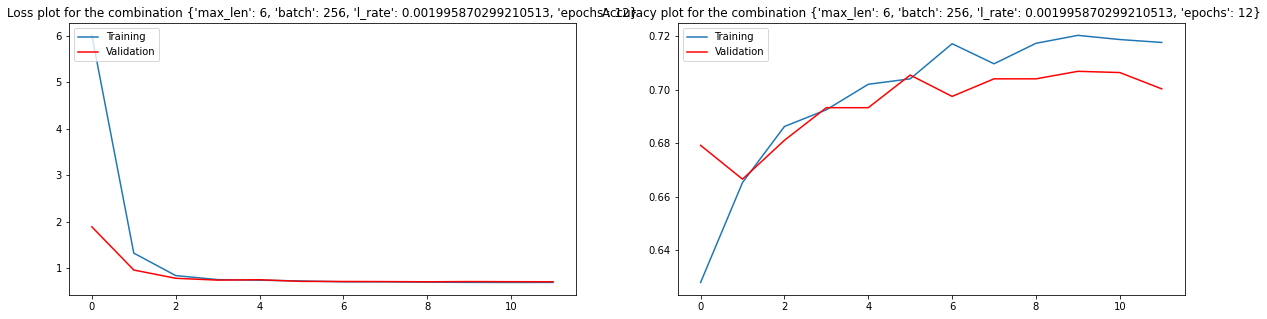

 50%|█████     | 5/10 [01:03<01:03, 12.67s/it, best loss: -0.75]

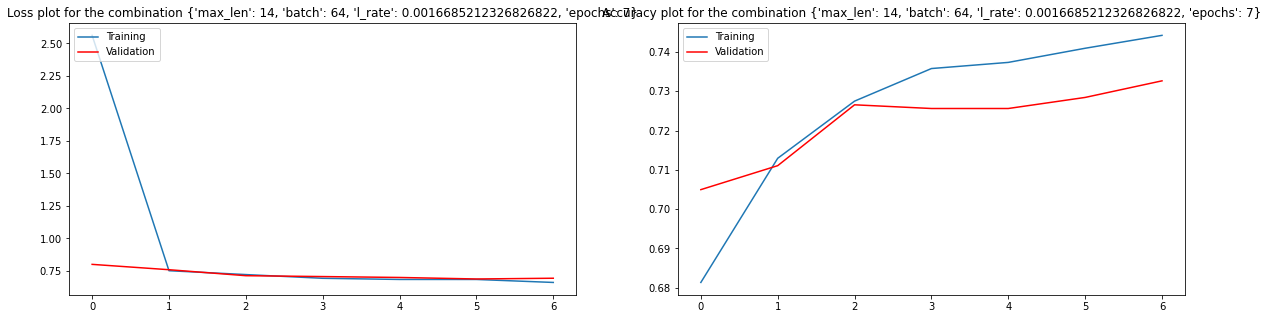

 60%|██████    | 6/10 [01:10<00:43, 10.97s/it, best loss: -0.75]

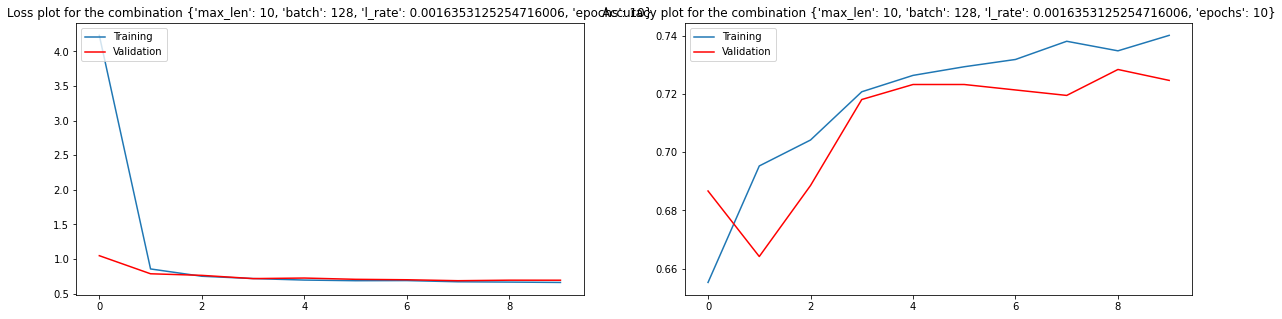

 70%|███████   | 7/10 [01:16<00:28,  9.63s/it, best loss: -0.75]

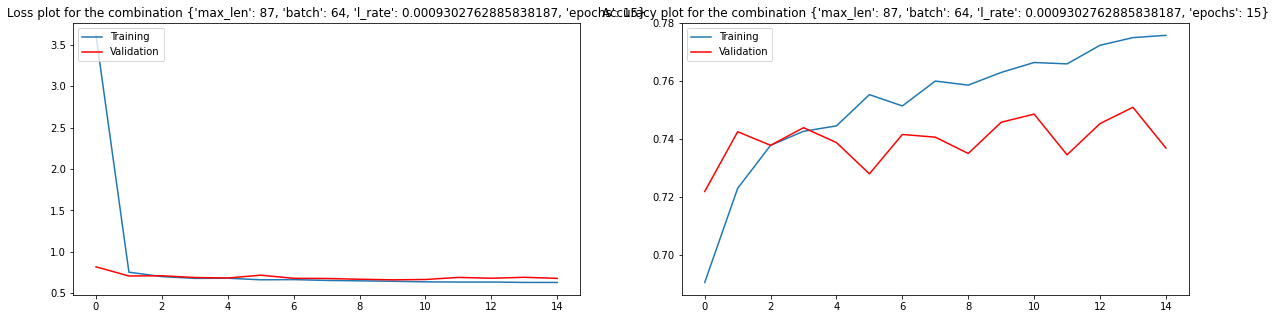

 80%|████████  | 8/10 [01:46<00:31, 15.65s/it, best loss: -0.75]

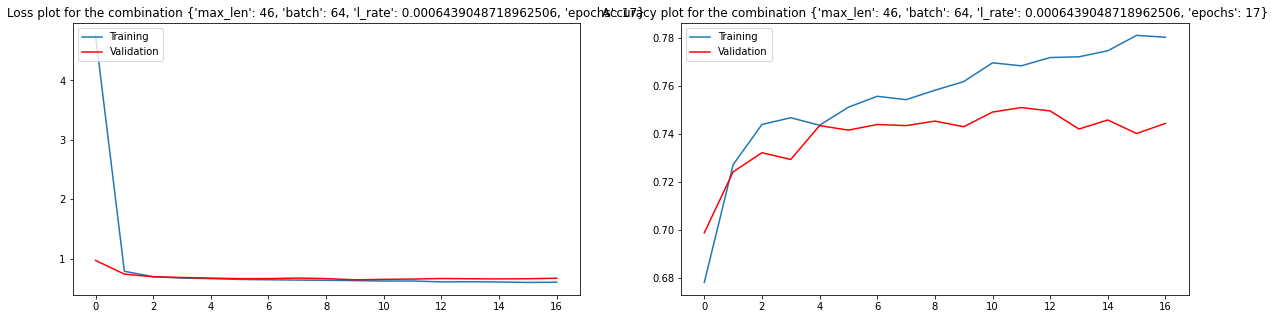

 90%|█████████ | 9/10 [02:07<00:17, 17.38s/it, best loss: -0.75]

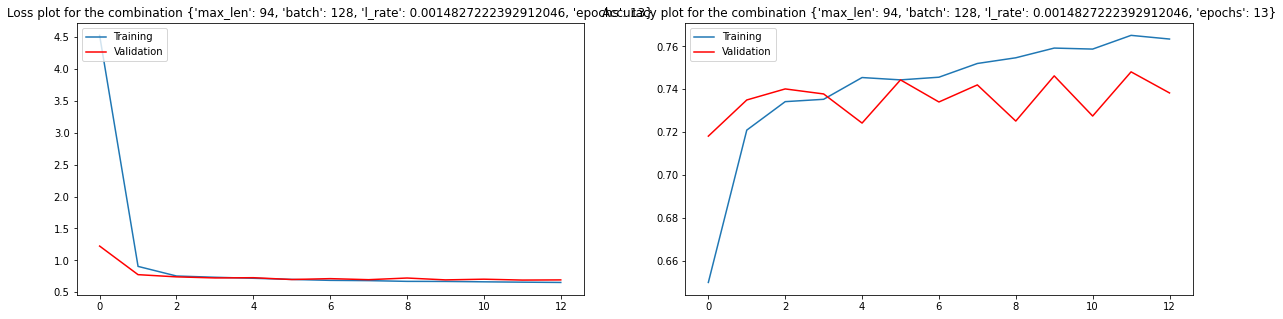

100%|██████████| 10/10 [02:28<00:00, 14.82s/it, best loss: -0.75]
{'batch_size': 1, 'epochs': 11, 'learning_rate': 0.0019321962879111313, 'max_length': 27}


In [ ]:
def objective_func(args):
    max_length = args['max_length']
    batch_size = args['batch_size']
    learning_rate = args['learning_rate']
    epochs = args['epochs']

    
    encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
    training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')
    embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings)
    adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
    model = model_lstm_em(embedding_matrix, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

    history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=0, batch_size=batch_size, shuffle =True, validation_split = 0.25)
    accuracy = history.history['val_accuracy'][-1]
    u = {}
    u['max_len'] = max_length
    u['batch'] = batch_size
    u['l_rate'] = learning_rate
    u['epochs'] = epochs

    fig, ax = plt.subplots(1,2,figsize = (20,5))

    ax[0].plot(history.history['loss'], label='Training')
    ax[0].plot(history.history['val_loss'], c='r',label='Validation')
    ax[0].legend(loc='upper left')
    ax[0].title.set_text('Loss plot for the combination ' + str(u))


    ax[1].plot(history.history['accuracy'], label='Training')
    ax[1].plot(history.history['val_accuracy'], c='r',label='Validation')
    ax[1].legend(loc='upper left')
    ax[1].title.set_text('Accuracy plot for the combination ' + str(u))  
    plt.show()

#     encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])

#     validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding=padd, truncating = trunc)
#     loss, accuracy = model.evaluate(validation_padded, validation['Sentiment'], verbose=0)
    return -round((accuracy),2)

space = {'max_length': hp.choice('max_length',range(4,50)),  
        'batch_size': hp.choice('batch_size', [32, 64, 128]),
         'epochs': hp.choice('epochs',range(5,20)), 
         'learning_rate': hp.uniform('learning_rate', 0,0.002)
        }
                                
                                
tokenise_tf = Tokenizer()
tokenise_tf.fit_on_texts(training['Doc Text'])                                
best_lstm_em = fmin(objective_func, space, algo=tpe.suggest, max_evals=10)
print(best_lstm_em)

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

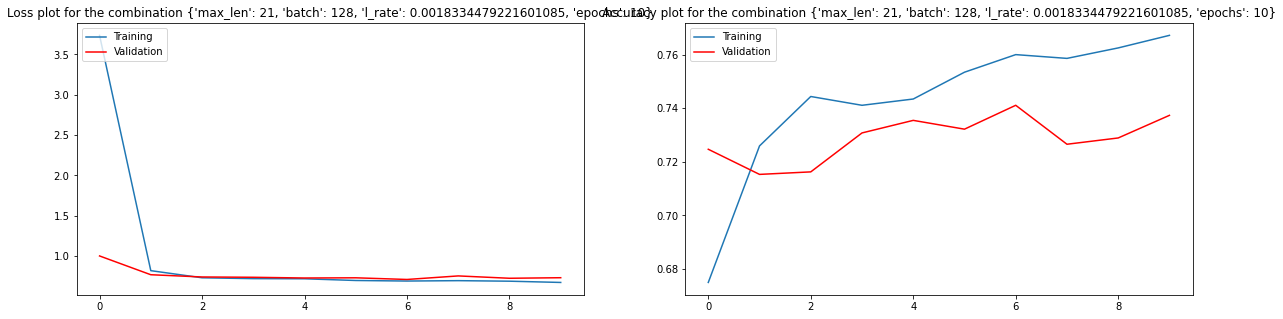

 10%|█         | 1/10 [00:07<01:05,  7.30s/it, best loss: -0.74]

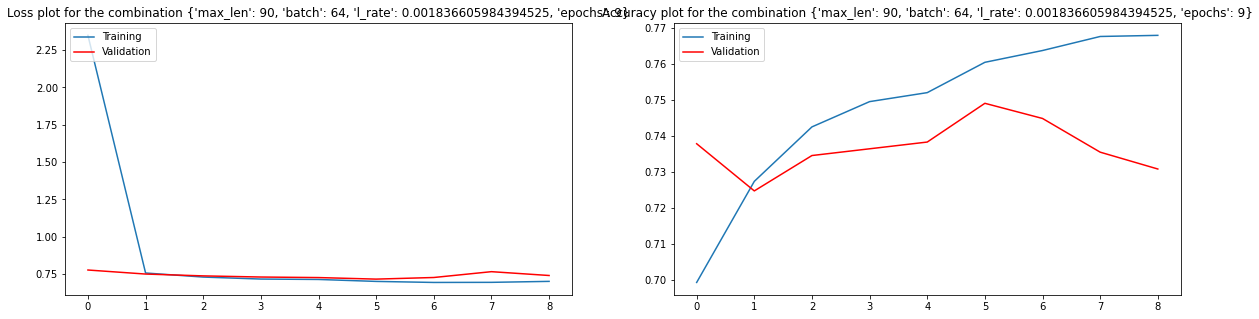

 20%|██        | 2/10 [00:24<01:22, 10.33s/it, best loss: -0.74]

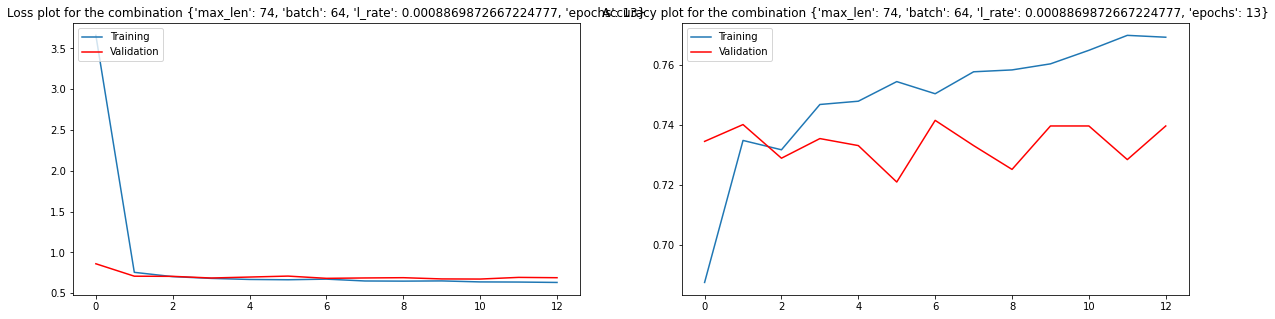

 30%|███       | 3/10 [00:46<01:35, 13.63s/it, best loss: -0.74]

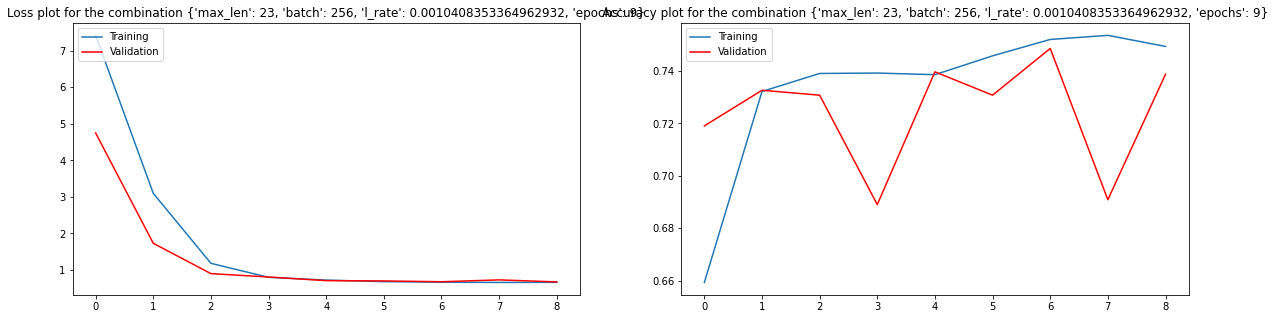

 40%|████      | 4/10 [00:51<01:07, 11.28s/it, best loss: -0.74]

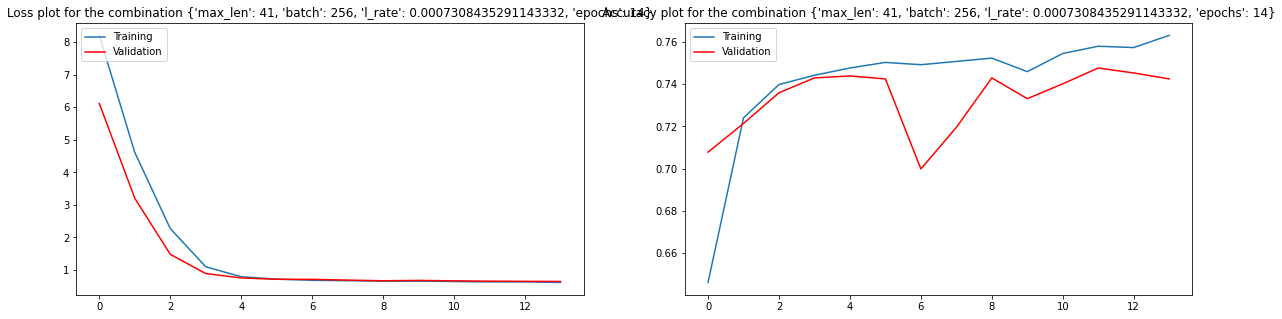

 50%|█████     | 5/10 [01:01<00:54, 10.94s/it, best loss: -0.74]

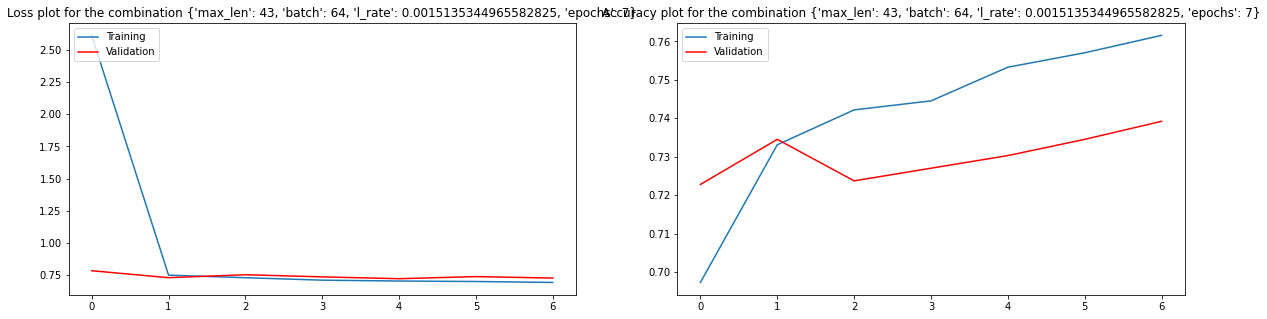

 60%|██████    | 6/10 [01:11<00:42, 10.51s/it, best loss: -0.74]

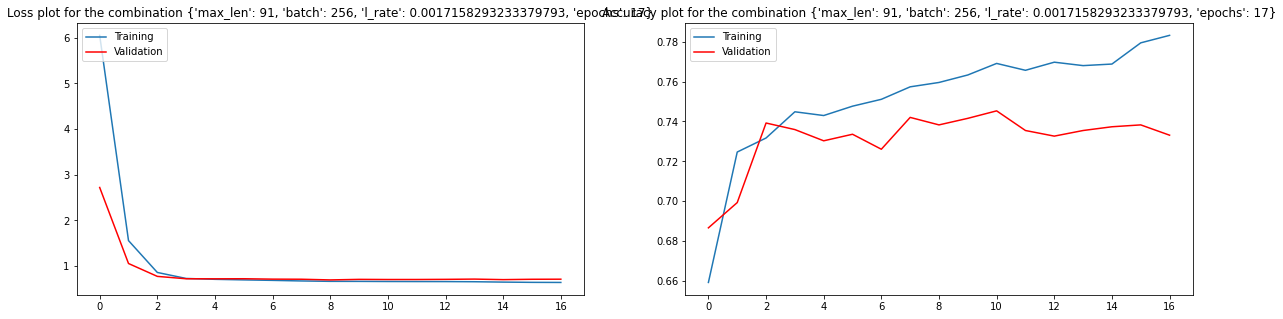

 70%|███████   | 7/10 [01:30<00:39, 13.21s/it, best loss: -0.74]

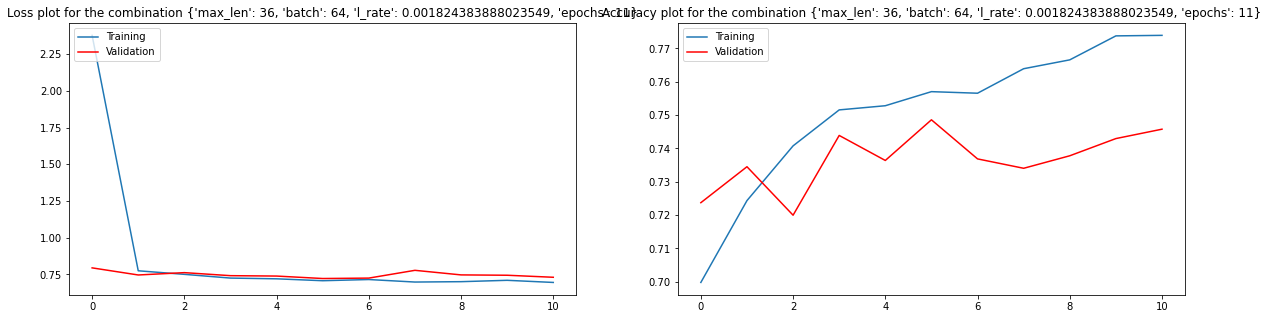

 80%|████████  | 8/10 [01:43<00:26, 13.09s/it, best loss: -0.75]

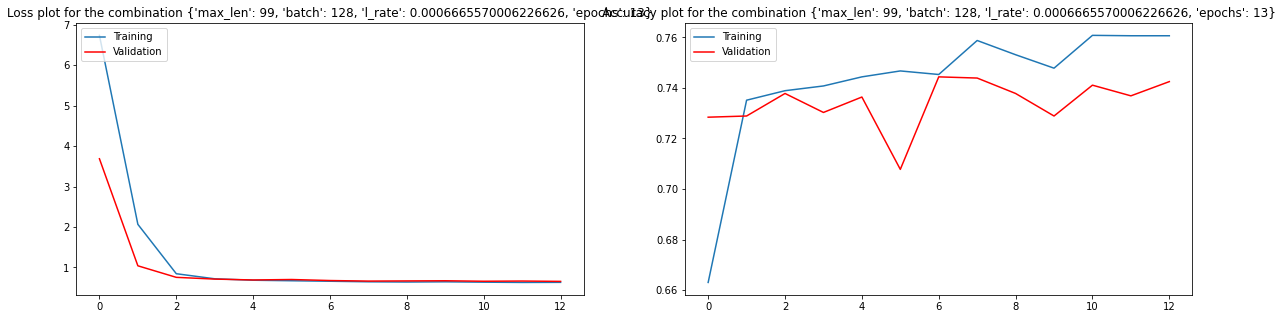

 90%|█████████ | 9/10 [02:03<00:15, 15.05s/it, best loss: -0.75]

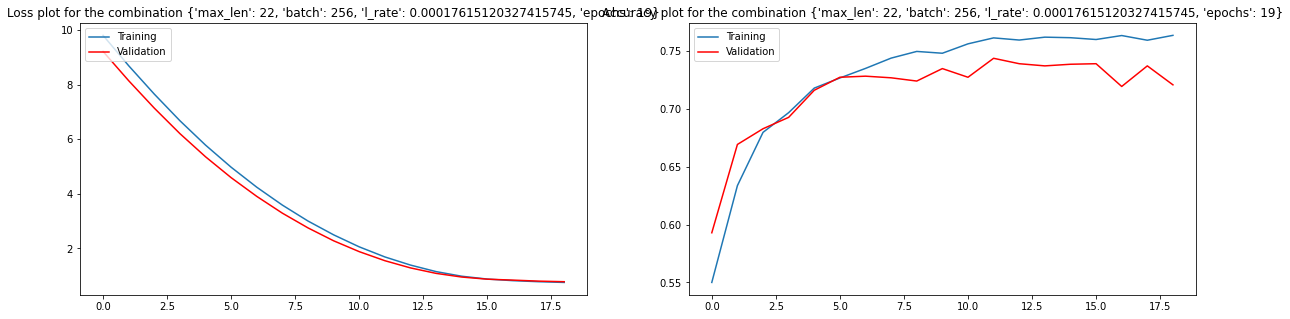

100%|██████████| 10/10 [02:12<00:00, 13.27s/it, best loss: -0.75]
{'batch_size': 0, 'epochs': 6, 'learning_rate': 0.001824383888023549, 'max_length': 32}


In [ ]:
def objective_func(args):
    max_length = args['max_length']
    batch_size = args['batch_size']
    learning_rate = args['learning_rate']
    epochs = args['epochs']

    
    encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
    training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')
    embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings)
    adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
    model = model_gru_em(embedding_matrix, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

    history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=0, batch_size=batch_size, shuffle =True, validation_split = 0.25)
    accuracy = history.history['val_accuracy'][-1]
    u = {}
    u['max_len'] = max_length
    u['batch'] = batch_size
    u['l_rate'] = learning_rate
    u['epochs'] = epochs

    fig, ax = plt.subplots(1,2,figsize = (20,5))

    ax[0].plot(history.history['loss'], label='Training')
    ax[0].plot(history.history['val_loss'], c='r',label='Validation')
    ax[0].legend(loc='upper left')
    ax[0].title.set_text('Loss plot for the combination ' + str(u))


    ax[1].plot(history.history['accuracy'], label='Training')
    ax[1].plot(history.history['val_accuracy'], c='r',label='Validation')
    ax[1].legend(loc='upper left')
    ax[1].title.set_text('Accuracy plot for the combination ' + str(u))  
    plt.show()

#     encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])

#     validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding=padd, truncating = trunc)
#     loss, accuracy = model.evaluate(validation_padded, validation['Sentiment'], verbose=0)
    return -round((accuracy),2)

space = {'max_length': hp.choice('max_length',range(4,50)),  
        'batch_size': hp.choice('batch_size', [32, 64, 128]),
         'epochs': hp.choice('epochs',range(5,20)), 
         'learning_rate': hp.uniform('learning_rate', 0,0.002)
        }
                                
                                
tokenise_tf = Tokenizer()
tokenise_tf.fit_on_texts(training['Doc Text'])                                
best_gru_em = fmin(objective_func, space, algo=tpe.suggest, max_evals=10)
print(best_gru_em)

In [ ]:
# training.to_csv('Training Data.csv')
# test.to_csv('Test Data.csv')

In [ ]:
# def generate_embedding_matrix(word_embeddings):
#     vocabulary_size = len(tokenizer.word_index)+1
#     embedding_matrix = np.zeros((vocabulary_size, 300))
#     for word, index in tokenizer.word_index.items():
#         embedding_vector = word_embeddings.get(word)
#         if embedding_vector is not None:
#             embedding_matrix[index] = embedding_vector
#     return embedding_matrix,vocabulary_size

In [ ]:
# input_len = 50
# tokenizer = Tokenizer(oov_token='<OOV>')
# tokenizer.fit_on_texts(training['Doc Text'])
# X_train_processed = tokenizer.texts_to_sequences(training['Doc Text'])
# X_train_processed = pad_sequences(X_train_processed, padding='post', maxlen=input_len,truncating='pre')
# embedding_matrix,vocabulary_size = generate_embedding_matrix(embeddings)
# tf.keras.backend.clear_session()
# model = Sequential()
# embedding_layer = Embedding(vocabulary_size, 300, weights=[embedding_matrix], input_length=input_len,trainable = False,mask_zero=True)
# model.add(embedding_layer)
# model.add(SimpleRNN(300,kernel_regularizer = tf.keras.regularizers.L1(0.01)))

# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
# # adam_optimizer = optimizers.adam(learning_rate=learning_rate)
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# print(model.summary())
# model.fit(X_train_processed, training['Sentiment'], batch_size=128, epochs=30, verbose=1)

In [ ]:
def model_vanilla_rnn_bd(embedding_matrix, vocab_size, max_length, adam_optimizer, activation, Dropout_rate, kernel_regularizer_coef, activity_regularizer_coef):

    model = Sequential()
    e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable = False)
    model.add(e)
    model.add(Bidirectional(SimpleRNN(units = 300, activation = activation, kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef))))
    model.add(Dropout(Dropout_rate))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef)))
    model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     print(model.summary())
    return model


In [ ]:
max_length = 40
epochs = 15
learning_rate = 0.001
batch_size = 64
encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')
embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings)
adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
model = model_vanilla_rnn_bd(embedding_matrix, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=1, batch_size=batch_size, shuffle =True, validation_split = 0.25)
accuracy = history.history['val_accuracy'][-1]

Epoch 1/15
126/126 [==============================] - 42s 335ms/step - loss: 5.1197 - accuracy: 0.6622 - val_loss: 2.0090 - val_accuracy: 0.6917
Epoch 2/15
126/126 [==============================] - 41s 324ms/step - loss: 1.2526 - accuracy: 0.7154 - val_loss: 0.8993 - val_accuracy: 0.7223
Epoch 3/15
126/126 [==============================] - 42s 337ms/step - loss: 0.8545 - accuracy: 0.7227 - val_loss: 0.8080 - val_accuracy: 0.7123
Epoch 4/15
126/126 [==============================] - 42s 333ms/step - loss: 0.7917 - accuracy: 0.7279 - val_loss: 0.7485 - val_accuracy: 0.7322
Epoch 5/15
126/126 [==============================] - 41s 324ms/step - loss: 0.7515 - accuracy: 0.7346 - val_loss: 0.7596 - val_accuracy: 0.7093
Epoch 6/15
126/126 [==============================] - 41s 323ms/step - loss: 0.7265 - accuracy: 0.7335 - val_loss: 0.7388 - val_accuracy: 0.7207
Epoch 7/15
126/126 [==============================] - 42s 333ms/step - loss: 0.7380 - accuracy: 0.7310 - val_loss: 0.7363 - val_ac

In [ ]:
def model_lstm_bd(embedding_matrix, vocab_size, max_length, adam_optimizer, activation, Dropout_rate, kernel_regularizer_coef, activity_regularizer_coef):

    model = Sequential()
    e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable = False)
    model.add(e)
    model.add(Bidirectional(LSTM(units = 300, activation = activation, kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef))))
    model.add(Dropout(Dropout_rate))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L1(kernel_regularizer_coef), activity_regularizer=tf.keras.regularizers.L2(activity_regularizer_coef)))
    model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     print(model.summary())
    return model


In [ ]:
max_length = 40
epochs = 20
learning_rate = 0.001
batch_size = 128
encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')
embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings)
adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
model = model_lstm_bd(embedding_matrix, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)

history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=1, batch_size=batch_size, shuffle =True, validation_split = 0.25)
accuracy = history.history['val_accuracy'][-1]

Epoch 1/20
63/63 [==============================] - 74s 1s/step - loss: 9.0225 - accuracy: 0.6624 - val_loss: 1.3562 - val_accuracy: 0.7123
Epoch 2/20
63/63 [==============================] - 73s 1s/step - loss: 0.9291 - accuracy: 0.7110 - val_loss: 0.7748 - val_accuracy: 0.7314
Epoch 3/20
63/63 [==============================] - 76s 1s/step - loss: 0.7501 - accuracy: 0.7287 - val_loss: 0.7347 - val_accuracy: 0.7391
Epoch 4/20
63/63 [==============================] - 75s 1s/step - loss: 0.7241 - accuracy: 0.7325 - val_loss: 0.7345 - val_accuracy: 0.7207
Epoch 5/20
63/63 [==============================] - 74s 1s/step - loss: 0.7086 - accuracy: 0.7361 - val_loss: 0.7189 - val_accuracy: 0.7376
Epoch 6/20
63/63 [==============================] - 75s 1s/step - loss: 0.6910 - accuracy: 0.7414 - val_loss: 0.6886 - val_accuracy: 0.7406
Epoch 7/20
63/63 [==============================] - 75s 1s/step - loss: 0.6857 - accuracy: 0.7417 - val_loss: 0.6896 - val_accuracy: 0.7399
Epoch 8/20
63/63 [==

In [ ]:
def objective_func(args):
    max_length = args['max_length']
#     af_in_simpleRNN = args['af_in_simpleRNN']
    batch_size = args['batch_size']
    learning_rate = args['learning_rate']
#     padd = args['padd']
#     trunc = args['trunc']
    epochs = args['epochs']
#     kernel_regularizer_coef = args['kernel_regularizer_coef']
#     activity_regularizer_coef = args['activity_regularizer_coef']
#     Dropout_rate = args['Dropout_rate']
    
    encoded_train = tokenise_tf.texts_to_sequences(training['Doc Text'])
    training_padded = pad_sequences(encoded_train, maxlen=max_length, padding='post', truncating = 'pre')
    embedding_matrix, vocab_size = emb_matrix(tokenise_tf, embeddings)
    adam_optimizer = optimizers.Adam(learning_rate=learning_rate)
    model = model_vanilla_rnn_bd(embedding_matrix, vocab_size, max_length, adam_optimizer, 'tanh', 0.2, 0.001, 0.001)
    
    history = model.fit(training_padded, training['Sentiment'], epochs=epochs, verbose=0, batch_size=batch_size, shuffle =True, validation_split = 0.25)
    accuracy = history.history['val_accuracy'][-1]
    
    # summarize history for accuracy
    plt.figure(figsize=(10,5))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()    
    
#     encoded_validation = tokenise_tf.texts_to_sequences(validation['Doc Text'])

#     validation_padded = pad_sequences(encoded_validation, maxlen=max_length, padding=padd, truncating = trunc)
#     loss, accuracy = model.evaluate(validation_padded, validation['Sentiment'], verbose=0)
    return -round((accuracy),2)

space = {'max_length': hp.choice('max_length',range(4,100)), 
#          'af_in_simpleRNN': hp.choice('af_in_simpleRNN', ['tanh', 'sigmoid']), 
        'batch_size': hp.choice('batch_size', [64, 128, 256]),
#          'padd': hp.choice('padd', ['pre', 'post']),
#          'trunc': hp.choice('trunc', ['pre', 'post']),
         'epochs': hp.choice('epochs',range(5,20)), 
         'learning_rate': hp.uniform('learning_rate', 0,1)
#          'Dropout_rate': hp.uniform('Dropout_rate', 0, 1),
#          'kernel_regularizer_coef': hp.uniform('kernel_regularizer_coef', 0, 10),
#          'activity_regularizer_coef': hp.uniform('activity_regularizer_coef', 0, 10)
        }
                                
                                
tokenise_tf = Tokenizer()
tokenise_tf.fit_on_texts(training['Doc Text'])                                
best_vanilla_rnn_bd = fmin(objective_func, space, algo=tpe.suggest, max_evals=10)
print(best_vanilla_rnn_bd)

  0%|          | 0/10 [20:12<?, ?trial/s, best loss=?]


KeyboardInterrupt: 